In [1]:
# pretty_html = soup.prettify()
# print(pretty_html)

## Scrape until end

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time
import pandas as pd

url = "https://milaap.org/crowdfunding/fundraisers?filter%5Bcategory_id%5D=4"

options = Options()
options.headless = True
driver = webdriver.Chrome(options=options)
driver.get(url)

wait = WebDriverWait(driver, 10)

all_data = []
seen_links = set()  

page = 0
while True:
    try:
        load_more = wait.until(EC.element_to_be_clickable((By.ID, "load-more")))
        ActionChains(driver).move_to_element(load_more).click().perform()
        time.sleep(3)  # let new content load
        page += 1
        print(f"Page {page} loaded")

        # Scrape current HTML
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")

        fundraisers = soup.find_all("div", class_="campaign-card campaign-list-item")
        new_count = 0
        for camp in fundraisers:
            link = camp.find("a", class_="campaign-link")
            if not link:
                continue
            href = link["href"]
            
            if href in seen_links:
                continue

            img = camp.find("img")["data-src"] if camp.find("img") else None
            motivation = camp.find("div", class_="motivation").get_text(strip=True) if camp.find("div", class_="motivation") else None
            progress = camp.find("div", class_="progress-circle").span.get_text(strip=True) if camp.find("div", class_="progress-circle") and camp.find("div", class_="progress-circle").span else None
            raised = camp.find("div", class_="raised-amount").get_text(strip=True) if camp.find("div", class_="raised-amount") else None
            created_by = camp.find("div", class_="created-name").get_text(strip=True) if camp.find("div", class_="created-name") else None

            all_data.append({
                "Link": href,
                "Image": img,
                "Motivation": motivation,
                "Progress": progress,
                "Raised": raised,
                "Created By": created_by
            })
            seen_links.add(href)
            new_count += 1

        print(f" → Added {new_count} new fundraisers. Total unique: {len(all_data)}")

        if new_count == 0:
            print("No new fundraisers found. Stopping.")
            break

    except Exception as e:
        print("No more 'Load More' button or error:", e)
        break

driver.quit()

Page 1 loaded
 → Added 18 new fundraisers. Total unique: 18
Page 2 loaded
 → Added 9 new fundraisers. Total unique: 27
Page 3 loaded
 → Added 9 new fundraisers. Total unique: 36
Page 4 loaded
 → Added 9 new fundraisers. Total unique: 45
Page 5 loaded
 → Added 9 new fundraisers. Total unique: 54
Page 6 loaded
 → Added 9 new fundraisers. Total unique: 63
Page 7 loaded
 → Added 9 new fundraisers. Total unique: 72
Page 8 loaded
 → Added 9 new fundraisers. Total unique: 81
Page 9 loaded
 → Added 9 new fundraisers. Total unique: 90
Page 10 loaded
 → Added 9 new fundraisers. Total unique: 99
Page 11 loaded
 → Added 9 new fundraisers. Total unique: 108
Page 12 loaded
 → Added 9 new fundraisers. Total unique: 117
Page 13 loaded
 → Added 9 new fundraisers. Total unique: 126
Page 14 loaded
 → Added 9 new fundraisers. Total unique: 135
Page 15 loaded
 → Added 9 new fundraisers. Total unique: 144
Page 16 loaded
 → Added 9 new fundraisers. Total unique: 153
Page 17 loaded
 → Added 9 new fundraisers.

In [13]:
df = pd.DataFrame(all_data)
df.to_csv("milaap_fundraisers_community.csv", index=False)
print("Scraping finished. Total fundraisers:", len(df))

✅ Scraping finished. Total fundraisers: 603


## Combining sheets

In [3]:
import requests
from bs4 import BeautifulSoup

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

url = "https://milaap.org/fundraisers/support-jacob-sathiyaseelan-1"

r = requests.get(url, headers=headers)
r.raise_for_status()

# get the page HTML
html = r.text  

# parse with BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

print(type(soup))        # <class 'bs4.BeautifulSoup'>


<class 'bs4.BeautifulSoup'>


<!DOCTYPE html>
<html>
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-Z9MHWKZVKX">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', "G-Z9MHWKZVKX");
  </script>
  <script>
   gtag('config','AW-10952202293');
  </script>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  '//www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-K3PC4W');
  </script>
  <!-- End Google Tag Manager -->
  <!-- Facebook Pixel Code -->
  <script>
   !function(f,b,e,v,n,t,s)
    {if(f.fbq)return;n=f.fbq=function(){n.callMethod?
    n.callMethod.apply
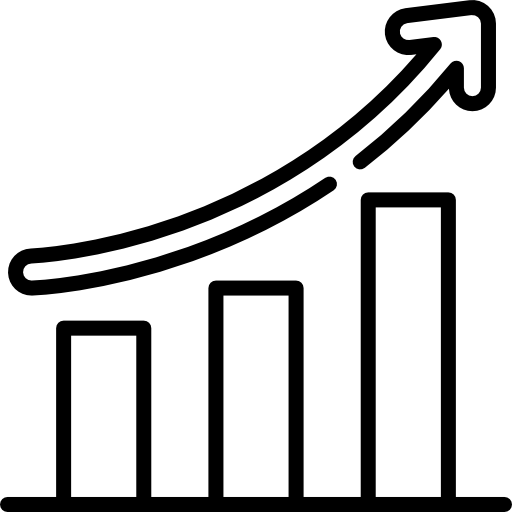
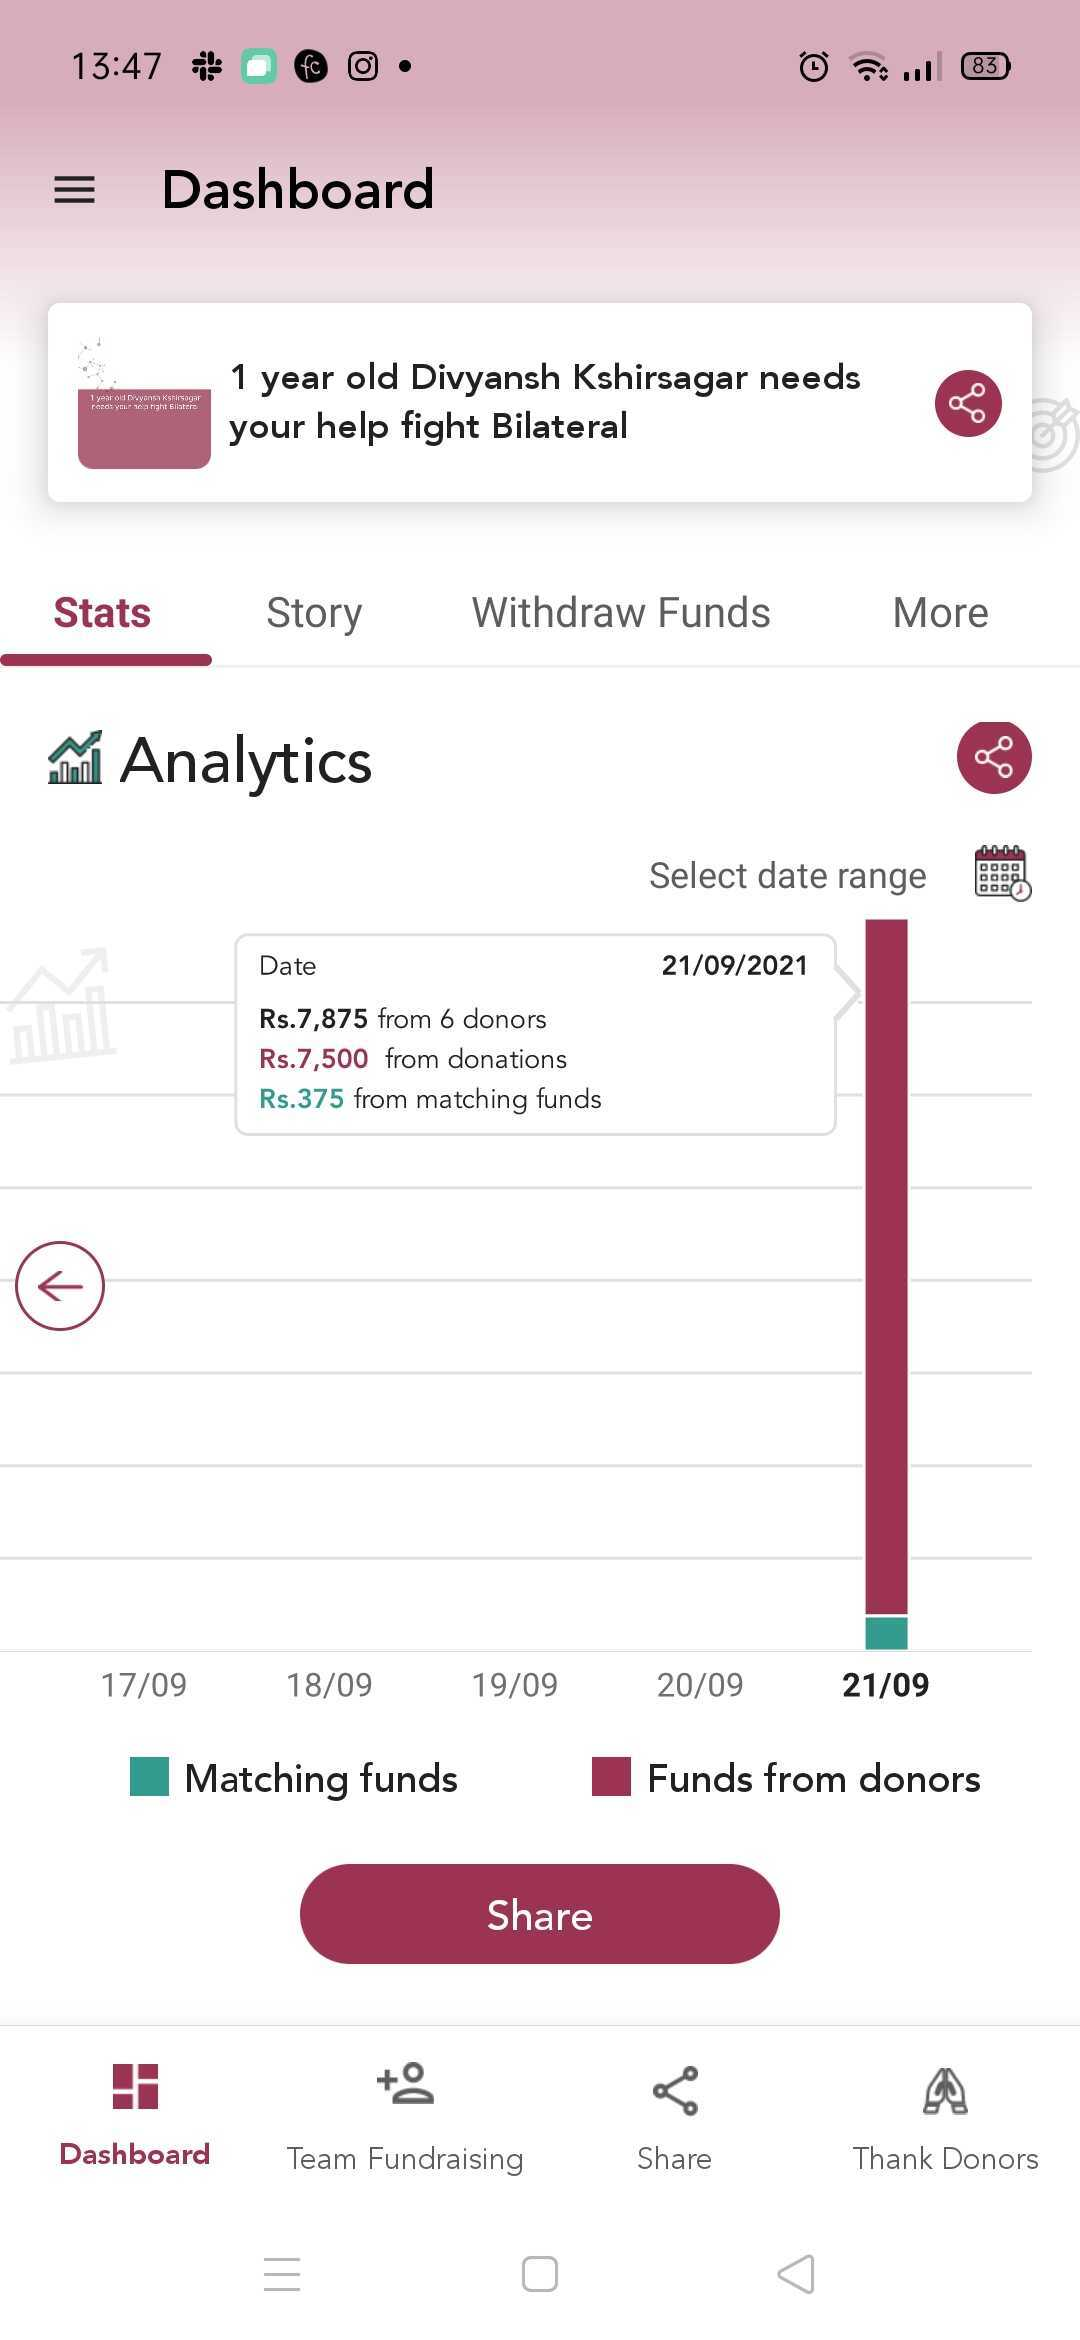
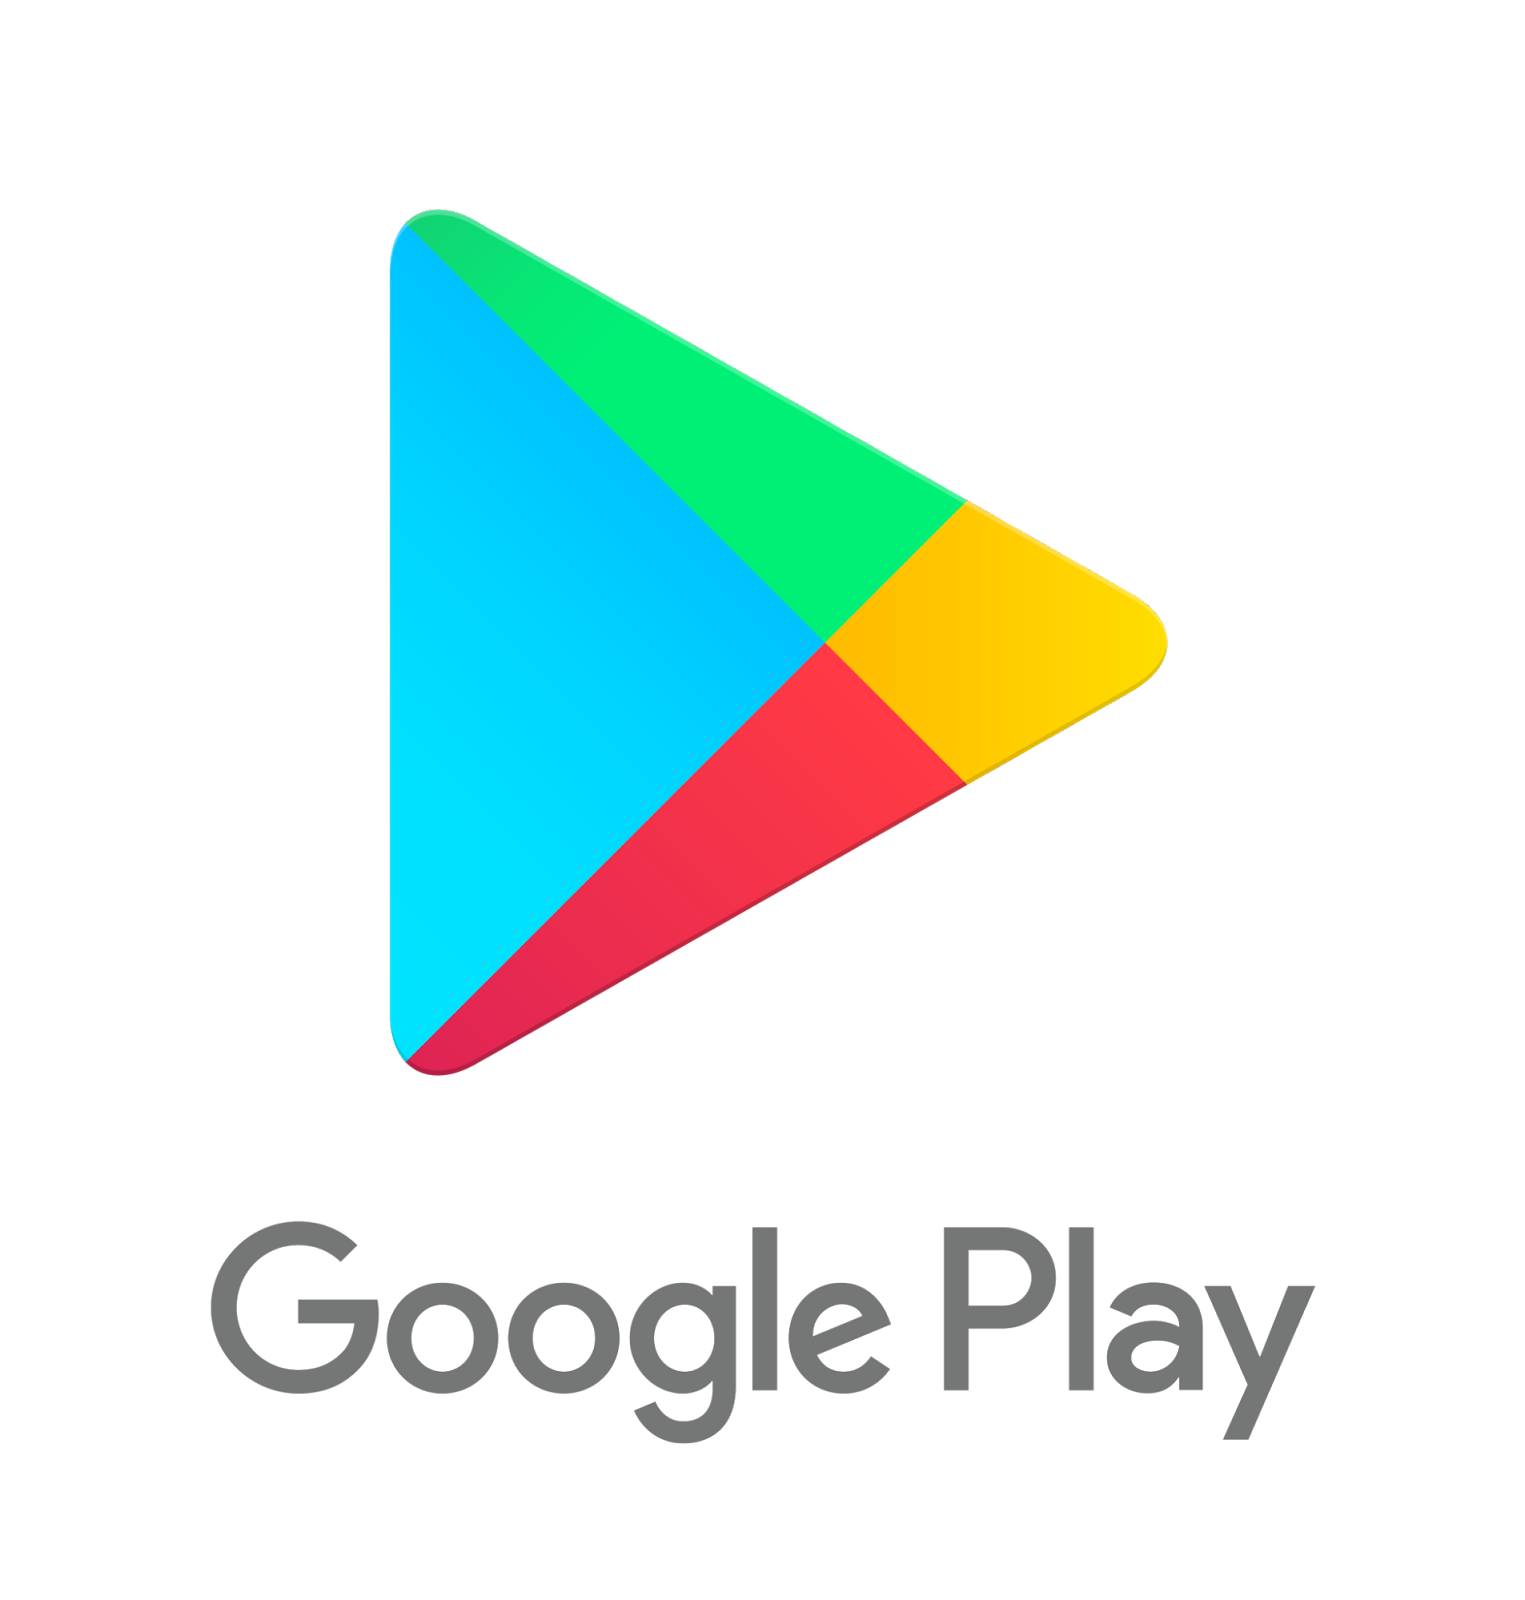
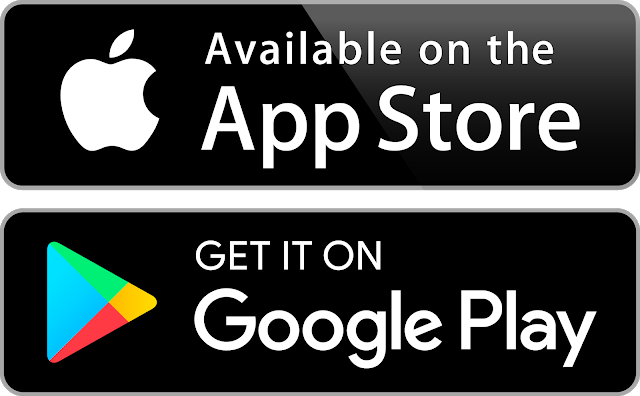

In [4]:
pretty_html = soup.prettify()
print(pretty_html)

In [3]:
fundraisers = soup.find_all("div", class_="supporters-count")
print(fundraisers[0])
f=fundraisers[0]
supp_count = 0

div = soup.find("div", class_="supporters-count")
link = div["data-supporter-listing-url"]
print(link)

supp_no = soup.find("span", class_="donation-count")
supp_text = supp_no.get_text(strip=True)
print(supp_text)
#     motivation = camp.find("div", class_="motivation").get_text(strip=True) if camp.find("div", class_="motivation") else None
#     progress = camp.find("div", class_="progress-circle").span.get_text(strip=True) if camp.find("div", class_="progress-circle") and camp.find("div", class_="progress-circle").span else None
#     raised = camp.find("div", class_="raised-amount").get_text(strip=True) if camp.find("div", class_="raised-amount") else None
#     created_by = camp.find("div", class_="created-name").get_text(strip=True) if camp.find("div", class_="created-name") else None

#     all_data.append({
#         "Link": href,
#         "Image": img,
#         "Motivation": motivation,
#         "Progress": progress,
#         "Raised": raised,
#         "Created By": created_by
#     })
#     seen_links.add(href)
#     new_count += 1

<div class="supporters-count" data-supporter-listing-url="https://milaap.org/fundraisers/959664/payments.json?hide_amount=false&amp;per=20">
<span class="donation-count">511 supporters</span>
<div id="supporters-list-container"></div>
</div>
https://milaap.org/fundraisers/959664/payments.json?hide_amount=false&per=20
511 supporters


In [20]:
import requests
from bs4 import BeautifulSoup

# sample fundraiser URL
fundraiser_url = "https://milaap.org/fundraisers/support-jacob-sathiyaseelan-1"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

# Step 1: Get the fundraiser page HTML
resp = requests.get(fundraiser_url, headers=headers)
resp.raise_for_status()
soup = BeautifulSoup(resp.text, "html.parser")

description_div = soup.find("div", class_=["story-content", "campaign-story"])
if description_div:
    description_text = description_div.get_text(separator=" ", strip=True)
#     print(description_text)
else:
    print("Description not found.")
# Step 2: Get supporters JSON link
supporters_div = soup.find("div", class_="supporters-count")
if supporters_div:
    json_url = supporters_div.get("data-supporter-listing-url")
else:
    json_url = None

# Step 3: Get supporters number
supporters_span = supporters_div.find("span", class_="donation-count") if supporters_div else None
if supporters_span:
    supporters_text = supporters_span.get_text(strip=True)
    supporters_number = int(supporters_text.split()[0])  # e.g. "481 supporters" -> 481
else:
    supporters_number = 0

print(f"Supporters JSON URL: {json_url}")
print(f"Supporters Count: {supporters_number}")

# Step 4: If valid, replace per=20 with per=<supporters_number - 1>
if json_url and supporters_number > 0:
    full_json_url = json_url.replace("per=20", f"per={supporters_number - 1}")
    print("Modified JSON URL:", full_json_url)

    # Step 5: Get all supporters JSON
    r2 = requests.get(full_json_url, headers=headers)
    r2.raise_for_status()
    data = r2.json()

    # Step 6: Extract contributor details
    # Step 6: Extract contributor details
    contributors = data.get("contributers", [])
    print(f"Found {len(contributors)} contributors.")
#     for c in contributors[:5]:
#         print(c["name"], "-", c["amount"])

# Now continue analysis (no json.loads needed)
import re

contribs = contributors  # same variable reuse

def convert_to_inr(amount_str):
    amount_str = amount_str.replace(',', '').strip()
    
    # Define approximate conversion rates to INR
    rates = {
        '₹': 1,
        '$': 83,
        'S$': 61,
        '£': 106,
        '€': 90,
        'د.إ': 22.6  # AED to INR
    }
    
    # Try to detect currency symbol
    for symbol, rate in rates.items():
        if symbol in amount_str:
            value = re.findall(r"[\d\.]+", amount_str)
            if value:
                return float(value[0]) * rate
            else:
                return 0
    
    # fallback if no currency symbol detected
    try:
        return float(amount_str)
    except:
        return 0


# Extract numeric amounts
all_donations = [convert_to_inr(c['amount']) for c in contribs]
anon_donations = [convert_to_inr(c['amount']) for c in contribs if c['name'].lower() == 'anonymous']

# Compute stats
summary = {
    "total_donations": len(all_donations),
    "max_donation_inr": max(all_donations),
    "min_donation_inr": min(all_donations),
    "avg_donation_inr": sum(all_donations) / len(all_donations),
    "anonymous_count": len(anon_donations),
    "max_anonymous_inr": max(anon_donations) if anon_donations else 0,
    "min_anonymous_inr": min(anon_donations) if anon_donations else 0,
    "avg_anonymous_inr": (sum(anon_donations)/len(anon_donations)) if anon_donations else 0,
    "description": description_text
}

for k, v in summary.items():
    print(f"{k}: {v:.2f}" if isinstance(v, float) else f"{k}: {v}")


Supporters JSON URL: https://milaap.org/fundraisers/959664/payments.json?hide_amount=false&per=20
Supporters Count: 511
Modified JSON URL: https://milaap.org/fundraisers/959664/payments.json?hide_amount=false&per=510
Found 510 contributors.
total_donations: 510
max_donation_inr: 248170.00
min_donation_inr: 10.00
avg_donation_inr: 7818.98
anonymous_count: 207
max_anonymous_inr: 248170.00
min_anonymous_inr: 100.00
avg_anonymous_inr: 6715.39
description: 🌱 Support Jacob – An Organic Farmer Who Dedicated His Life to the society Jacob, an organic farmer from Thalavaadi (near Sathyamangalam), once worked in the USA as an IT professional. In 2022, he made the courageous decision to quit his job abroad and return to India to dedicate himself fully to organic farming and social service. Since then, he has guided farmers free of cost, spread awareness about sustainable agriculture, and built a healthier, more eco-friendly future. 🎥 Watch Jacob’s work: https://youtu.be/yHTT_jfS9MY https://youtu.b

In [1]:
import requests
from bs4 import BeautifulSoup

# sample fundraiser URL
fundraiser_url = "https://milaap.org/fundraisers/support-rahul-ganguly"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

# Step 1: Get the fundraiser page HTML
resp = requests.get(fundraiser_url, headers=headers)
resp.raise_for_status()
soup = BeautifulSoup(resp.text, "html.parser")

C:\Users\rithv\anaconda3\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (2.5.0) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


<!DOCTYPE html>
<html>
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-Z9MHWKZVKX">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', "G-Z9MHWKZVKX");
  </script>
  <script>
   gtag('config','AW-10952202293');
  </script>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  '//www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-K3PC4W');
  </script>
  <!-- End Google Tag Manager -->
  <!-- Facebook Pixel Code -->
  <script>
   !function(f,b,e,v,n,t,s)
    {if(f.fbq)return;n=f.fbq=function(){n.callMethod?
    n.callMethod.apply
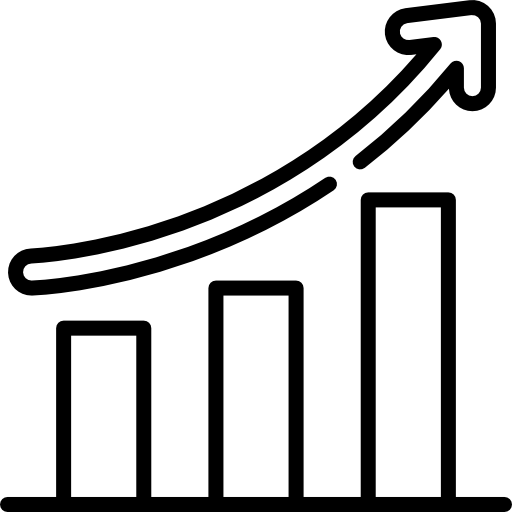
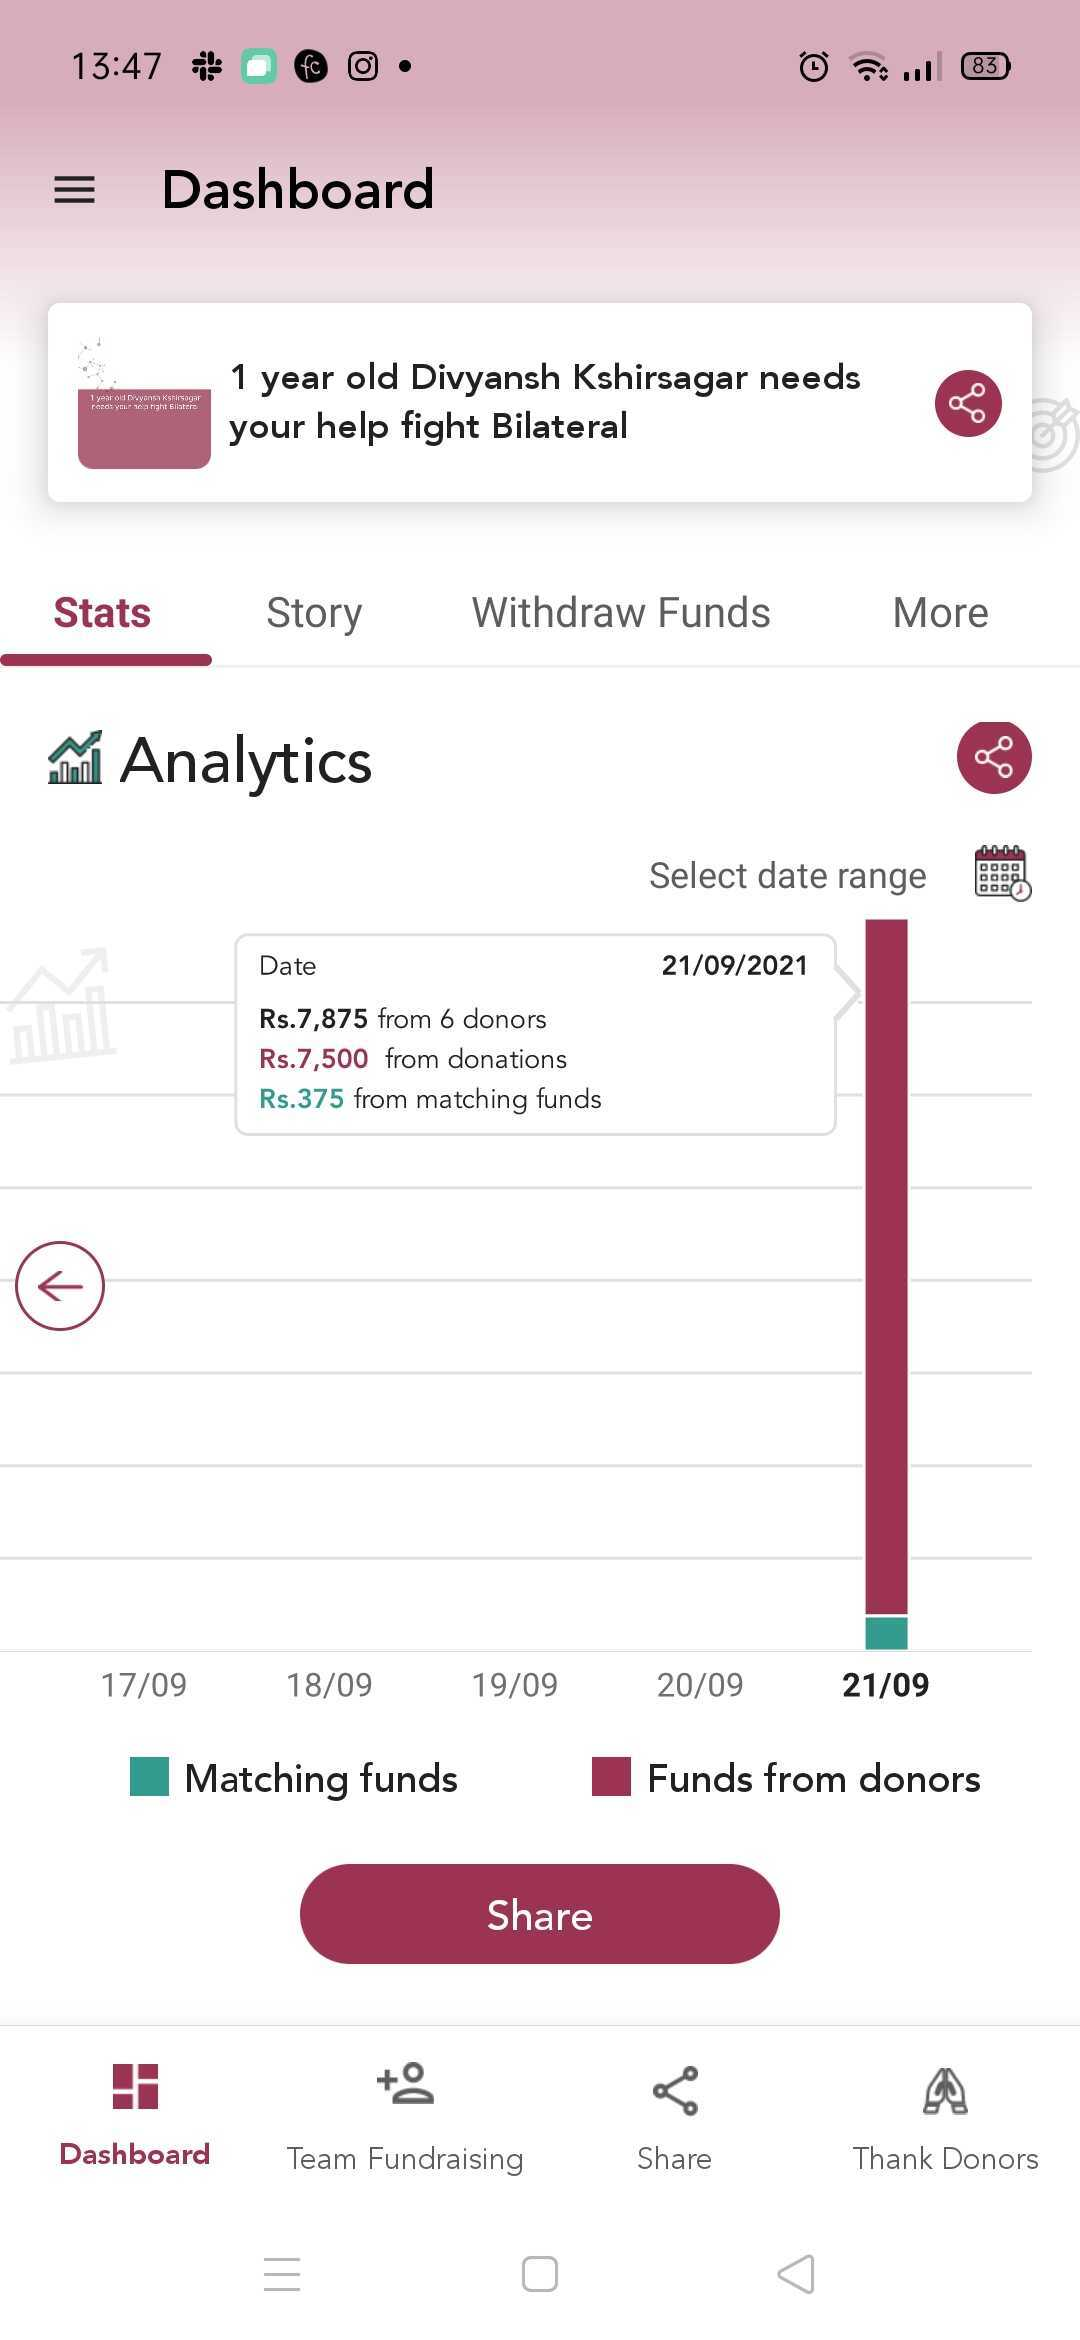
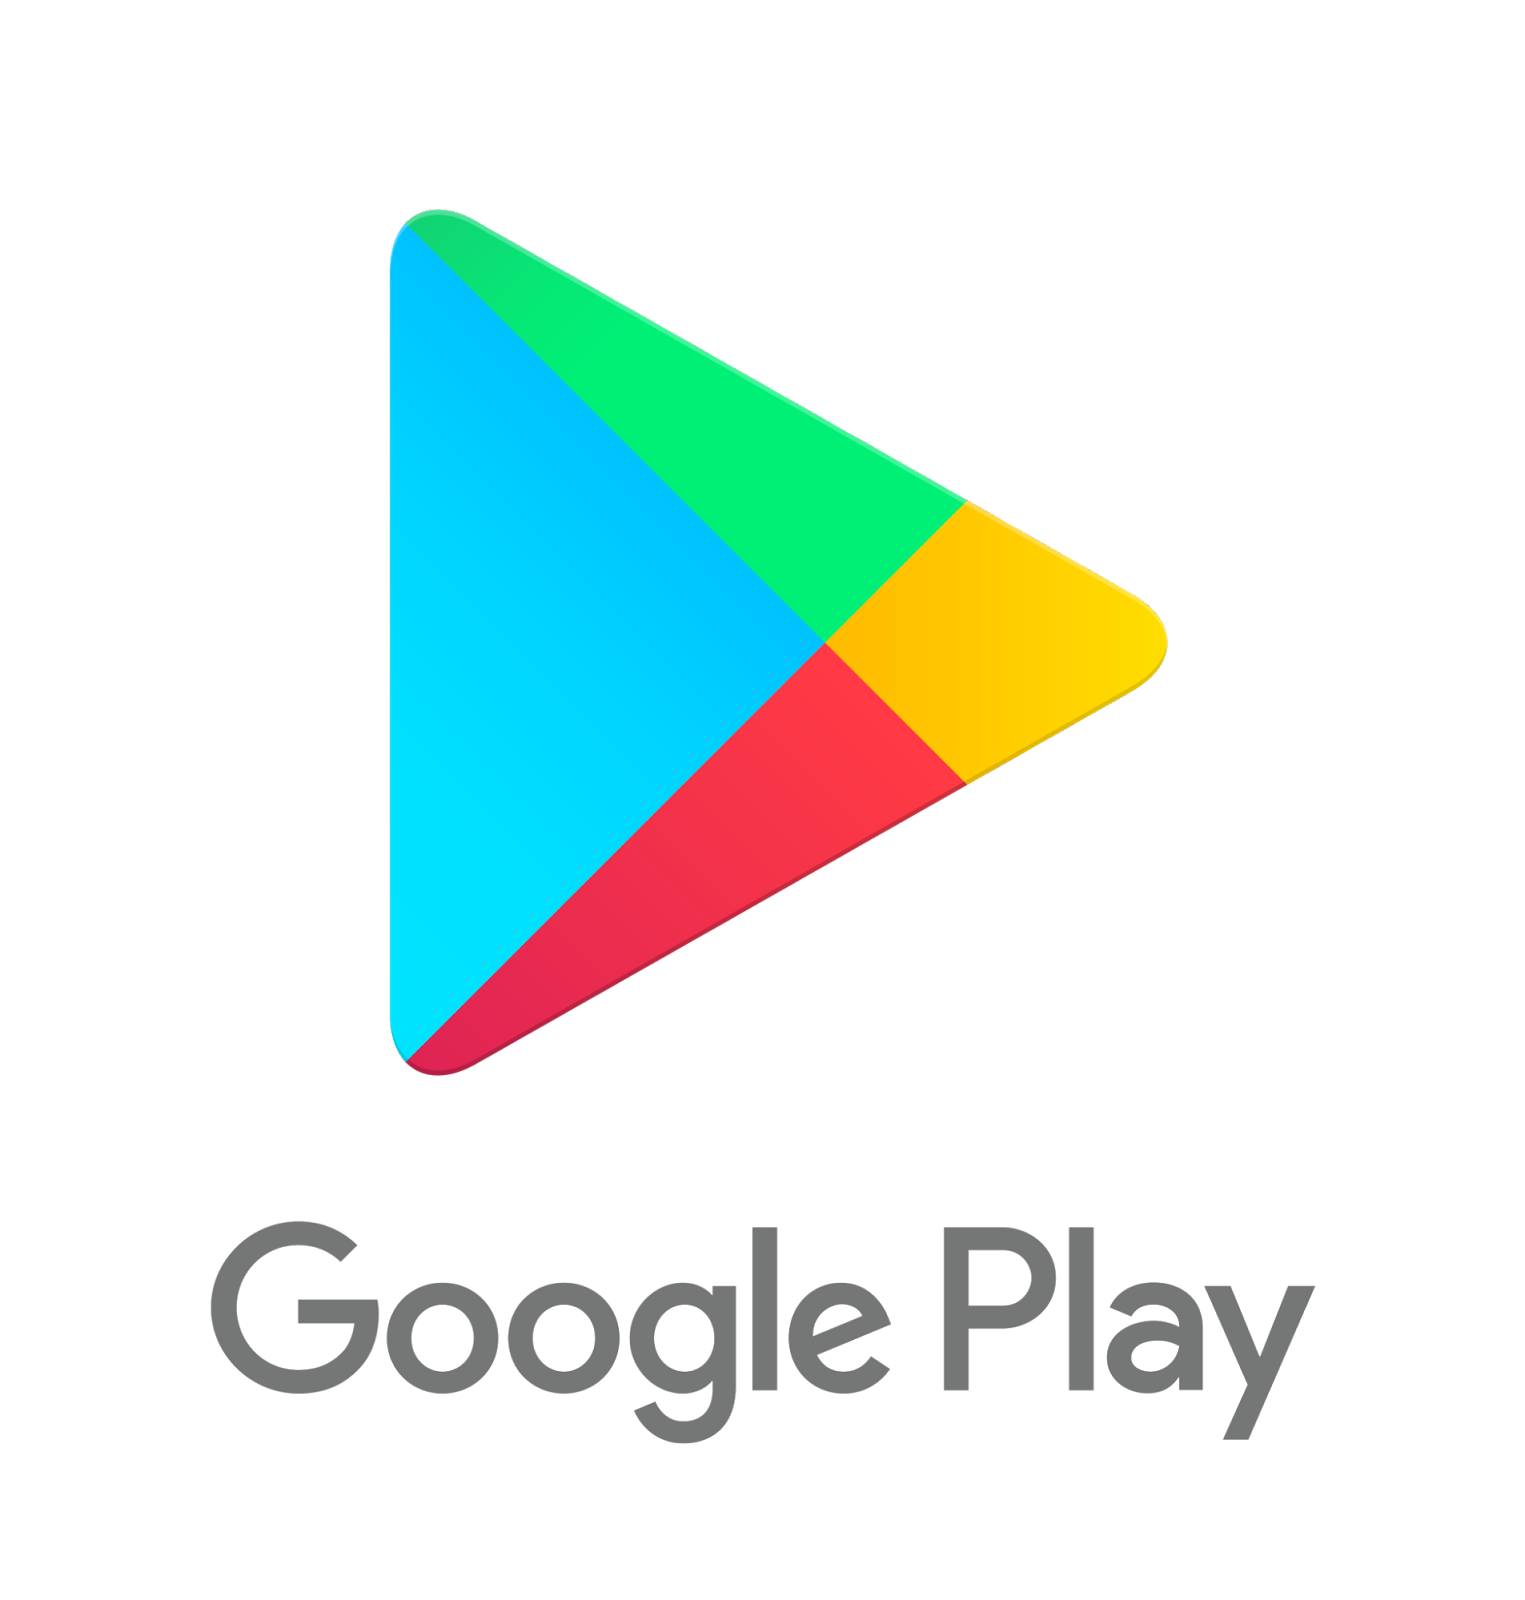
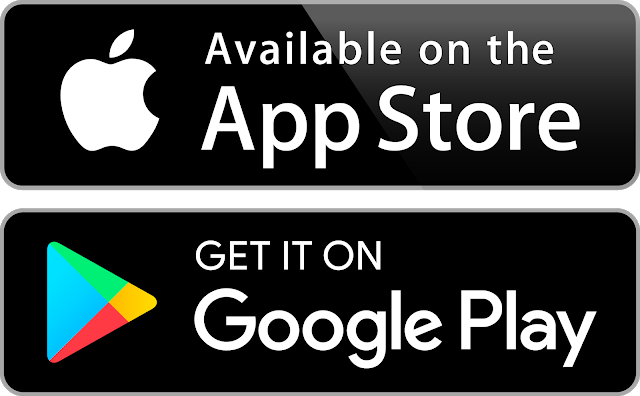

In [2]:
pretty_html = soup.prettify()
print(pretty_html)

In [8]:
import requests
from bs4 import BeautifulSoup

url = "https://milaap.org/fundraisers/support-kat-katha-2"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, "html.parser")

# Milaap usually keeps the description inside a <div> with class "story-content" or "campaign-story"
description_div = soup.find("div", class_=["story-content", "campaign-story"])

if description_div:
    description_text = description_div.get_text(separator=" ", strip=True)
    print(description_text)
else:
    print("Description not found.")


The first time I walked into a brothel on GB Road, I thought I was there to do a job. I had my notepad, my questions, my official tag. I was working with NACO at the time, focused on HIV prevention. I thought I was there to ‘sensitize’ the women—to educate them about condoms and clients. What I didn’t expect was to be cracked open. There were about a dozen girls in that room. Some wore spaghetti tops, some sat silent, others distracted. One by one, men walked in and picked who they wanted. I watched one girl hesitate—her face said no—but her body followed orders as the landlord took money and nodded. She left, returned, disposed of something in the dustbin, washed her hands, and quietly sat back in line. I sat there for hours, stunned. When I returned home that night, I didn’t feel like an officer. I felt like a witness to something nobody ever warned me about. These weren’t nameless “sex workers” on some dusty file. They were girls with stories, women with scars, and children growing 

<!DOCTYPE html>

<html>
<head>
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-Z9MHWKZVKX"></script>
<script>
    window.dataLayer = window.dataLayer || [];
    function gtag(){dataLayer.push(arguments);}
    gtag('js', new Date());

    gtag('config', "G-Z9MHWKZVKX");


  </script>
<script>
    gtag('config','AW-10952202293');
  </script>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  '//www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-K3PC4W');</script>
<!-- End Google Tag Manager -->
<!-- Facebook Pixel Code -->
<script>
    !function(f,b,e,v,n,t,s)
    {if(f.fbq)return;n=f.fbq=function(){n.callMethod?
    n.callMethod.apply(n,arguments):n.queue.p
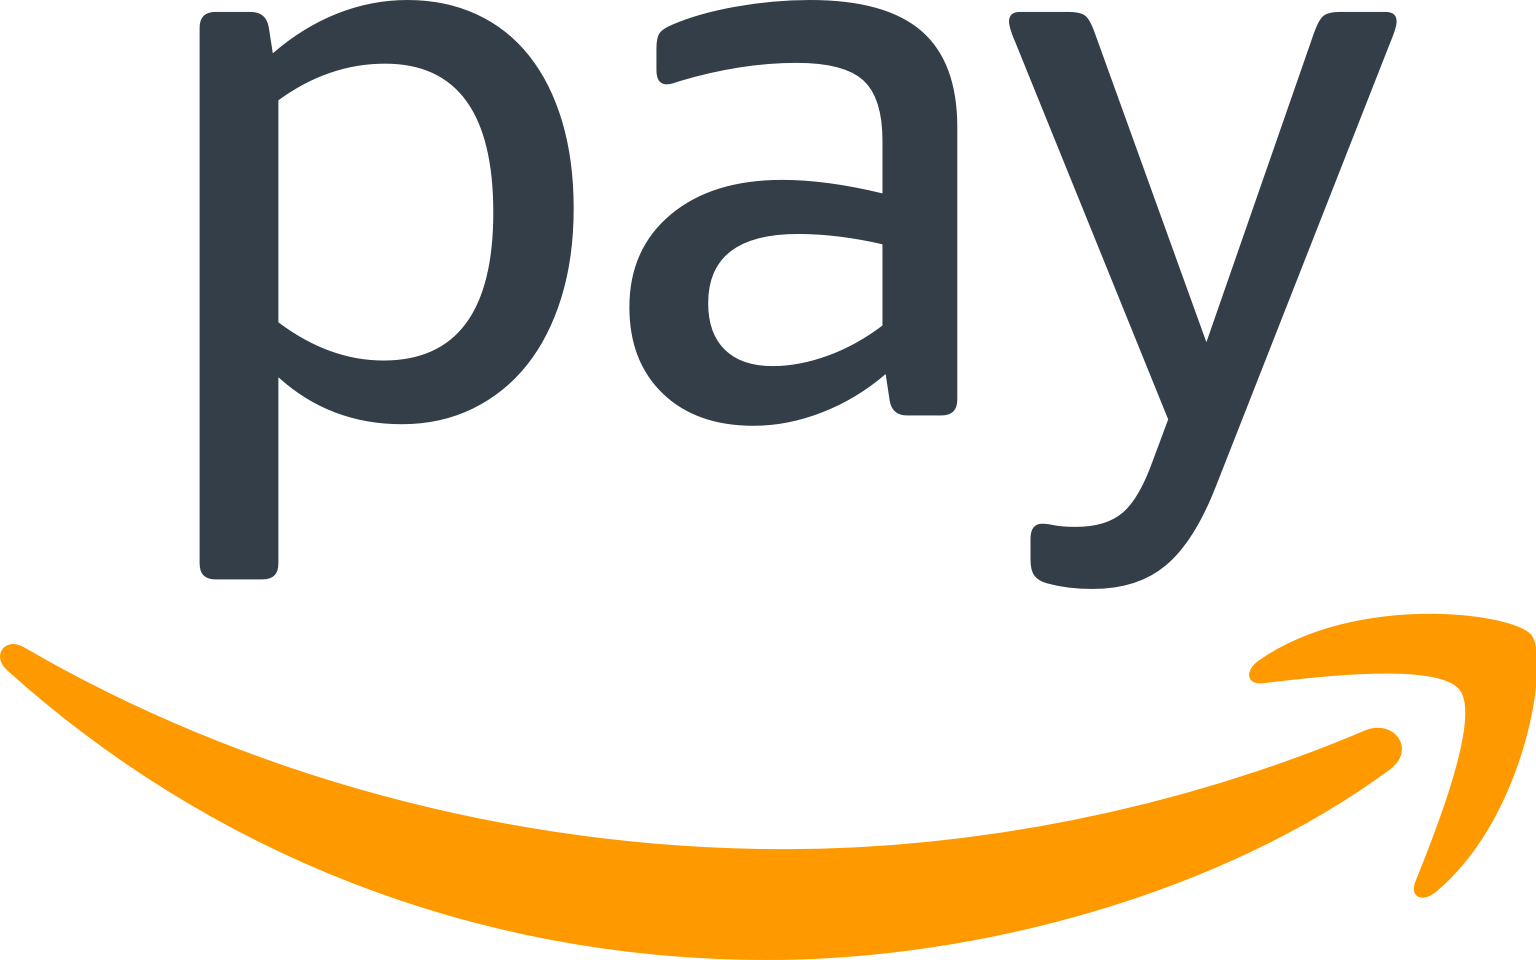
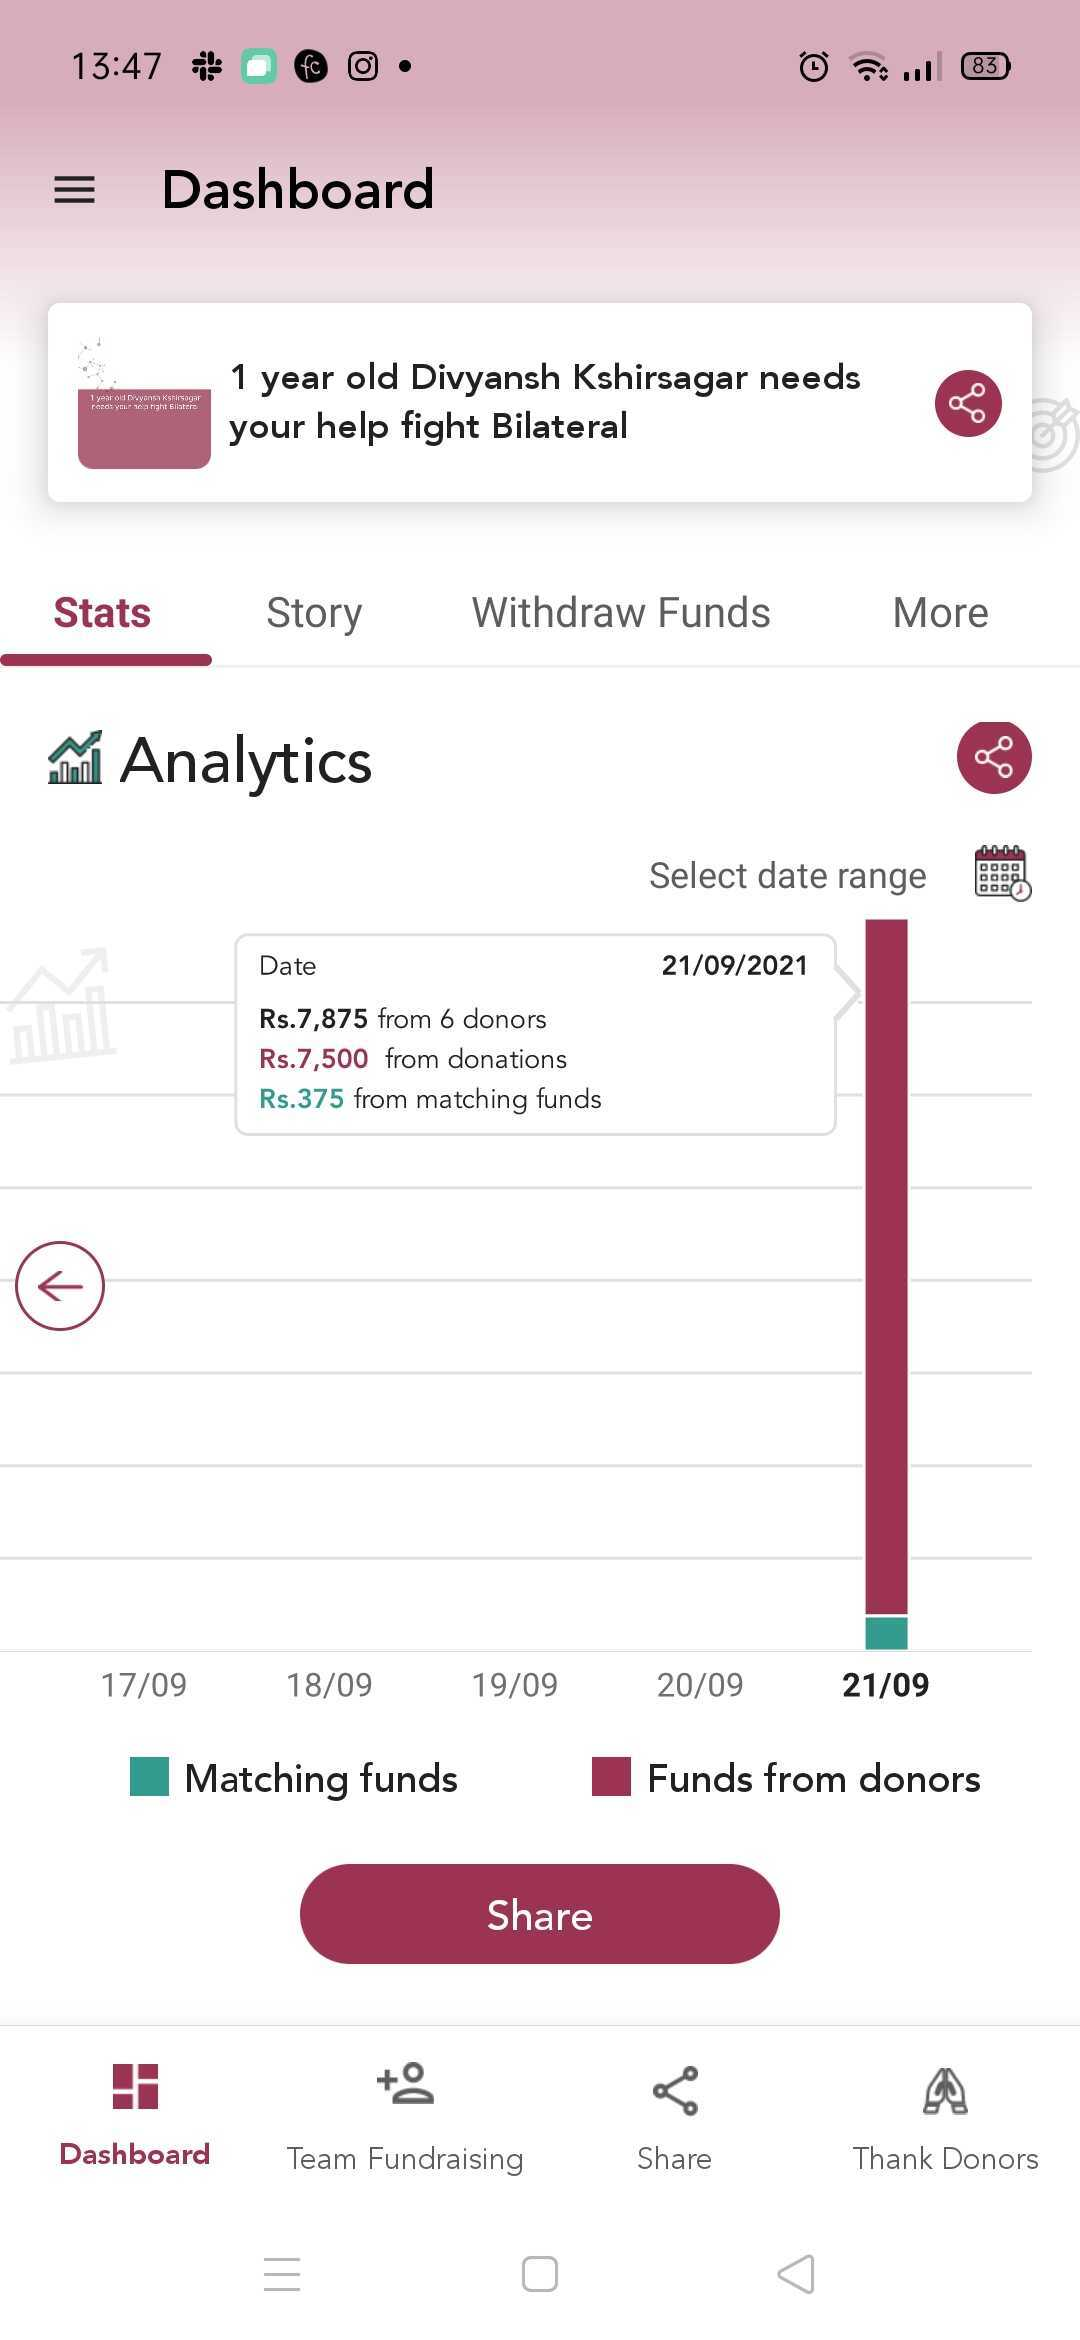
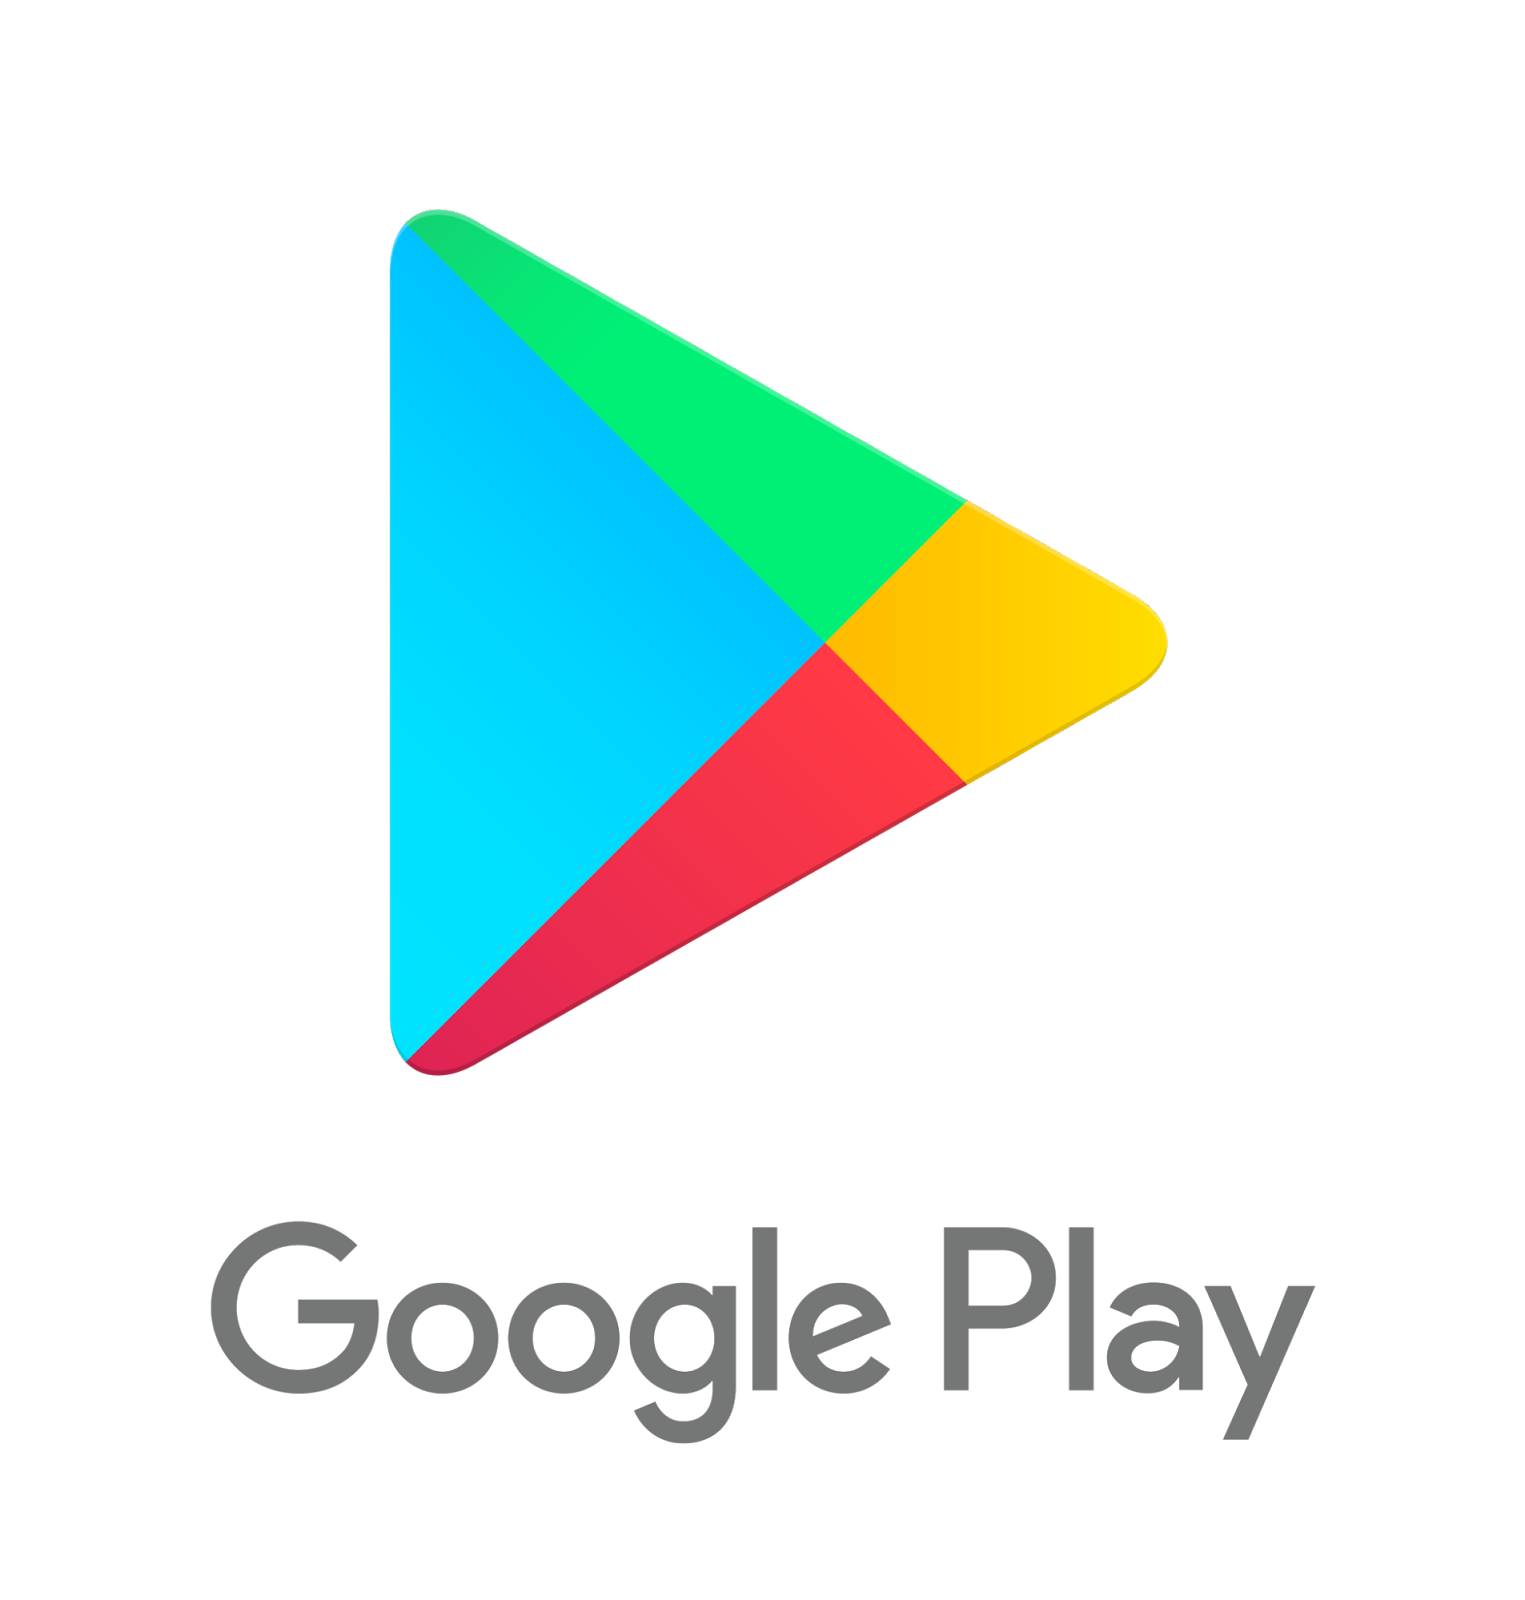
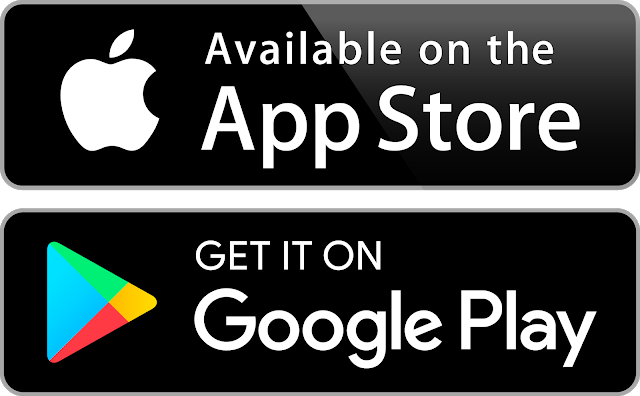

In [9]:
soup

In [23]:
df = pd.read_csv("milaap_fundraisers_memorials_test.csv")  # should contain a column named "url"
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

# ---- your conversion function ----
def convert_to_inr(amount_str):
    amount_str = amount_str.replace(',', '').strip()
    rates = {'₹': 1, '$': 83, 'S$': 61, '£': 106, '€': 90, 'د.إ': 22.6}
    for symbol, rate in rates.items():
        if symbol in amount_str:
            value = re.findall(r"[\d\.]+", amount_str)
            if value:
                return float(value[0]) * rate
            else:
                return 0
    try:
        return float(amount_str)
    except:
        return 0

# ---- function to scrape a single link ----
def process_fundraiser(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
    }
    
    try:
        resp = requests.get(url, headers=headers, timeout=15)
        resp.raise_for_status()
        soup = BeautifulSoup(resp.text, "html.parser")
        
        # --- Description ---
        desc_div = soup.find("div", class_=["story-content", "campaign-story"])
        description_text = desc_div.get_text(separator=" ", strip=True) if desc_div else ""
        
        target_div = soup.find("div", class_=["target"])
        target_text = target_div.get_text(separator=" ", strip=True) if target_div else ""
        
        amount_div = soup.find("div", class_=["amount"])
        amount_text = amount_div.get_text(separator=" ", strip=True) if amount_div else ""
        
        # --- Supporters URL and count ---
        supporters_div = soup.find("div", class_="supporters-count")
        json_url = supporters_div.get("data-supporter-listing-url") if supporters_div else None
        
        supporters_span = supporters_div.find("span", class_="donation-count") if supporters_div else None
        if supporters_span:
            supporters_text = supporters_span.get_text(strip=True)
            supporters_number = int(supporters_text.split()[0]) if supporters_text.split()[0].isdigit() else 0
        else:
            supporters_number = 0
        
        # --- If we have JSON data ---
        if json_url and supporters_number > 0:
            full_json_url = json_url.replace("per=20", f"per={supporters_number - 1}")
            r2 = requests.get(full_json_url, headers=headers, timeout=15)
            r2.raise_for_status()
            data = r2.json()
            contributors = data.get("contributers", [])
        else:
            contributors = []
        
        # --- Compute metrics ---
        if not contributors:
            return {
                "Target":target_text,
                "Amount Raised":amount_text,
                "num_donations": 0,
                "max_donation_inr": 0,
                "min_donation_inr": 0,
                "avg_donation_inr": 0,
                "num_anonymous": 0,
                "max_anon_inr": 0,
                "min_anon_inr": 0,
                "avg_anon_inr": 0,
                "description": description_text
            }
        
        all_donations = [convert_to_inr(c['amount']) for c in contributors]
        anon_donations = [convert_to_inr(c['amount']) for c in contributors if c['name'].lower() == 'anonymous']

        summary = {
            "Target":target_text,
            "Amount Raised":amount_text,
            "num_donations": len(all_donations),
            "max_donation_inr": max(all_donations),
            "min_donation_inr": min(all_donations),
            "avg_donation_inr": sum(all_donations)/len(all_donations),
            "num_anonymous": len(anon_donations),
            "max_anon_inr": max(anon_donations) if anon_donations else 0,
            "min_anon_inr": min(anon_donations) if anon_donations else 0,
            "avg_anon_inr": (sum(anon_donations)/len(anon_donations)) if anon_donations else 0,
            "description": description_text
        }
        return summary

    except Exception as e:
        print(f"❌ Error processing {url}: {e}")
        return {
            "num_donations": 0, "max_donation_inr": 0, "min_donation_inr": 0, "avg_donation_inr": 0,
            "num_anonymous": 0, "max_anon_inr": 0, "min_anon_inr": 0, "avg_anon_inr": 0, "description": ""
        }

# ---- Process each link ----
results = []
for i, row in df.iterrows():
    url = row["Link"]
    print(f"Processing {i+1}/{len(df)}: {url}")
    info = process_fundraiser(url)
    results.append(info)
    time.sleep(2)  # polite delay to avoid rate limiting

# ---- Merge results back into df ----
results_df = pd.DataFrame(results)
final_df = pd.concat([df, results_df], axis=1)

# ---- Save output ----
final_df.to_csv("fundraiser_analysis_Newwwww.csv", index=False)
print("✅ Saved to fundraiser_analysis.csv")


Processing 1/3: https://milaap.org/fundraisers/support-sandeepa
Processing 2/3: https://milaap.org/fundraisers/support-vivek-416
Processing 3/3: https://milaap.org/fundraisers/support-sree-vani-mohan
✅ Saved to fundraiser_analysis.csv


In [13]:
# import pandas as pd
# import glob
# import os

# # Path where your CSVs are stored (change if needed)
# path = r"C:\Users\rithv\Downloads"

# # Get all CSVs that start with 'milaap_fundraisers_'
# files = glob.glob(os.path.join(path, "milaap_fundraisers_*.csv"))

# all_dfs = []

# for file in files:
#     # Extract category name (part after 'milaap_fundraisers_' and before '.csv')
# #     category = os.path.basename(file).replace("milaap_fundraisers_", "").replace(".csv", "")
    
#     # Read CSV
#     try:
#         df = pd.read_csv(file)
#         df["category"] = category  # add category column
#         all_dfs.append(df)
#         print(f"Loaded {file} ({len(df)} rows)")
#     except Exception as e:
#         print(f"⚠️ Error reading {file}: {e}")

# # Concatenate all DataFrames
# if all_dfs:
#     merged_df = pd.concat(all_dfs, ignore_index=True)
#     print(f"\n✅ Combined total rows: {len(merged_df)}")
    
#     # Save to one CSV
#     merged_df.to_csv("milaap_fundraisers_all.csv", index=False)
#     print("💾 Saved as milaap_fundraisers_all.csv")
# else:
#     print("⚠️ No files loaded!")


## Final Data Parsing Code

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import json
import time
from html import unescape

# ---- Currency conversion ----
def convert_to_inr(amount_str):
    amount_str = amount_str.replace(',', '').strip()
    rates = {'₹': 1, '$': 83, 'S$': 61, '£': 106, '€': 90, 'د.إ': 22.6}
    for symbol, rate in rates.items():
        if symbol in amount_str:
            value = re.findall(r"[\d\.]+", amount_str)
            if value:
                return float(value[0]) * rate
            else:
                return 0
    try:
        return float(amount_str)
    except:
        return 0


# ---- Process a single fundraiser ----
def process_fundraiser(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    result = {
        "Target": 0, "Amount":0, "has_tax_benefit":0,
        "num_donations": 0, "max_donation_inr": 0, "min_donation_inr": 0, "avg_donation_inr": 0,
        "num_anonymous": 0, "max_anon_inr": 0, "min_anon_inr": 0, "avg_anon_inr": 0,
        "description": "", "updates_count": 0
    }

    # Pre-fill 9 update columns
    for i in range(1, 10):
        result[f"update_{i}_description"] = ""
        result[f"update_{i}_type"] = ""
        result[f"update_{i}_date"] = ""

    try:
        resp = requests.get(url, headers=headers, timeout=15)
        resp.raise_for_status()
        soup = BeautifulSoup(resp.text, "html.parser")

        # --- Description ---
        desc_div = soup.find("div", class_=["story-content", "campaign-story"])
        result["description"] = desc_div.get_text(separator=" ", strip=True) if desc_div else ""
        
        target_div = soup.find("div", class_=["target"])
        result["Target"] = target_div.get_text(separator=" ", strip=True) if target_div else ""
        
        amount_div = soup.find("div", class_=["amount"])
        result["Amount"] = amount_div.get_text(separator=" ", strip=True) if amount_div else ""
        
        tax_benefit = False
        msg_tag = soup.find("p", class_="message")
        if msg_tag and "tax benefits" in msg_tag.get_text(strip=True).lower():
            tax_benefit = True

        result["has_tax_benefit"] = tax_benefit

        # --- JSON for URLs ---
        script_tag = soup.find("script", {"id": "campaign-api-service", "type": "text/json"})
        campaign_updates_url = None
        if script_tag and script_tag.string:
            try:
                api_data = json.loads(script_tag.string)
                campaign_updates_url = api_data.get("campaignUpdatesUrl")
            except json.JSONDecodeError:
                pass

        # --- Supporters info ---
        supporters_div = soup.find("div", class_="supporters-count")
        json_url = supporters_div.get("data-supporter-listing-url") if supporters_div else None
        supporters_number = 0
        if supporters_div:
            span = supporters_div.find("span", class_="donation-count")
            if span:
                text = span.get_text(strip=True)
                num = re.findall(r"\d+", text)
                if num:
                    supporters_number = int(num[0])

        # --- Fetch donations ---
        contributors = []
        if json_url and supporters_number > 0:
            full_json_url = json_url.replace("per=20", f"per={supporters_number - 1}")
            r2 = requests.get(full_json_url, headers=headers, timeout=15)
            if r2.status_code == 200:
                data = r2.json()
                contributors = data.get("contributers", [])

        # --- Compute stats ---
        if contributors:
            all_donations = [convert_to_inr(c['amount']) for c in contributors]
            anon_donations = [convert_to_inr(c['amount']) for c in contributors if c['name'].lower() == 'anonymous']
            result.update({
                "num_donations": len(all_donations),
                "max_donation_inr": max(all_donations),
                "min_donation_inr": min(all_donations),
                "avg_donation_inr": sum(all_donations) / len(all_donations),
                "num_anonymous": len(anon_donations),
                "max_anon_inr": max(anon_donations) if anon_donations else 0,
                "min_anon_inr": min(anon_donations) if anon_donations else 0,
                "avg_anon_inr": (sum(anon_donations) / len(anon_donations)) if anon_donations else 0
            })

        # --- Fetch updates (up to 9) ---
        if campaign_updates_url:
            uresp = requests.get(campaign_updates_url, headers=headers, timeout=15)
            if uresp.status_code == 200:
                updates_json = uresp.json()
                updates = updates_json.get("campaign_updates", [])
                result["updates_count"] = len(updates)
                for i, upd in enumerate(updates[:9], start=1):
                    desc = BeautifulSoup(unescape(upd.get("description", "")), "html.parser").get_text(separator=" ", strip=True)
                    result[f"update_{i}_description"] = desc
                    result[f"update_{i}_type"] = upd.get("update_type", "")
                    result[f"update_{i}_date"] = upd.get("created_on", "")

        return result

    except Exception as e:
        print(f"❌ Error processing {url}: {e}")
        return result

df = pd.read_csv("milaap_fundraisers_all.csv") 
all_results = []
for i, row in df.iterrows():
    url = row["Link"]
    print(f"🔍 Processing {i+1}/{len(df)}: {url}")
    info = process_fundraiser(url)
    all_results.append(info)
    time.sleep(2)

results_df = pd.DataFrame(all_results)
final_df = pd.concat([df, results_df], axis=1)
final_df.to_csv("fundraiser_final_all.csv", index=False)
print("✅ Saved to csv")


🔍 Processing 1/2639: https://milaap.org/fundraisers/support-sick-and-abandoned-animals
🔍 Processing 2/2639: https://milaap.org/fundraisers/support-strays-of-delhi
🔍 Processing 3/2639: https://milaap.org/fundraisers/support-kamadhenu-gowshala
🔍 Processing 4/2639: https://milaap.org/fundraisers/support-karan-puri-foundation
🔍 Processing 5/2639: https://milaap.org/fundraisers/ummehanisiddiqui
🔍 Processing 6/2639: https://milaap.org/fundraisers/support-ganga-jangid
🔍 Processing 7/2639: https://milaap.org/fundraisers/support-mylos-foundation
🔍 Processing 8/2639: https://milaap.org/fundraisers/support-animal-rescue-12
🔍 Processing 9/2639: https://milaap.org/fundraisers/support-stray-puppies-6
🔍 Processing 10/2639: https://milaap.org/fundraisers/voicetostrays
🔍 Processing 11/2639: https://milaap.org/fundraisers/gauchikitsa
🔍 Processing 12/2639: https://milaap.org/fundraisers/support-dawood-3
🔍 Processing 13/2639: https://milaap.org/fundraisers/support-helping-hands-charitable-trust
🔍 Processi

🔍 Processing 112/2639: https://milaap.org/fundraisers/support-education-300
🔍 Processing 113/2639: https://milaap.org/fundraisers/support-education-for-all-130
🔍 Processing 114/2639: https://milaap.org/fundraisers/bhavyaa-1
🔍 Processing 115/2639: https://milaap.org/fundraisers/arjunnath
🔍 Processing 116/2639: https://milaap.org/fundraisers/mohinee
🔍 Processing 117/2639: https://milaap.org/fundraisers/nandhiithaa
🔍 Processing 118/2639: https://milaap.org/fundraisers/harshika-04
🔍 Processing 119/2639: https://milaap.org/fundraisers/jhiwal11
🔍 Processing 120/2639: https://milaap.org/fundraisers/for-education3
🔍 Processing 121/2639: https://milaap.org/fundraisers/rushachatterjee
🔍 Processing 122/2639: https://milaap.org/fundraisers/lovenish
🔍 Processing 123/2639: https://milaap.org/fundraisers/pragyaarya
🔍 Processing 124/2639: https://milaap.org/fundraisers/madhumitha123-hp
🔍 Processing 125/2639: https://milaap.org/fundraisers/utsavayush-hp
🔍 Processing 126/2639: https://milaap.org/fundrai

🔍 Processing 233/2639: https://milaap.org/fundraisers/kundan7
🔍 Processing 234/2639: https://milaap.org/fundraisers/strayabimals
🔍 Processing 235/2639: https://milaap.org/fundraisers/education-as-a-right
🔍 Processing 236/2639: https://milaap.org/fundraisers/padho-aur-padhao
🔍 Processing 237/2639: https://milaap.org/fundraisers/hpkapish
🔍 Processing 238/2639: https://milaap.org/fundraisers/plzshare
🔍 Processing 239/2639: https://milaap.org/fundraisers/drishamg05
🔍 Processing 240/2639: https://milaap.org/fundraisers/support-shubh-12
🔍 Processing 241/2639: https://milaap.org/fundraisers/sandramenon-socialhp22
🔍 Processing 242/2639: https://milaap.org/fundraisers/musteducation
🔍 Processing 243/2639: https://milaap.org/fundraisers/prateeksha18
🔍 Processing 244/2639: https://milaap.org/fundraisers/rtea2009
🔍 Processing 245/2639: https://milaap.org/fundraisers/sabanah
🔍 Processing 246/2639: https://milaap.org/fundraisers/eduforallsrinjana
🔍 Processing 247/2639: https://milaap.org/fundraisers/

🔍 Processing 345/2639: https://milaap.org/fundraisers/vansh-mahajan
🔍 Processing 346/2639: https://milaap.org/fundraisers/abhyudaymangla
🔍 Processing 347/2639: https://milaap.org/fundraisers/contributetoeducationforall
🔍 Processing 348/2639: https://milaap.org/fundraisers/akshat-00
🔍 Processing 349/2639: https://milaap.org/fundraisers/shagunchauhan
🔍 Processing 350/2639: https://milaap.org/fundraisers/vanshika-00
🔍 Processing 351/2639: https://milaap.org/fundraisers/atharvasrivastava
🔍 Processing 352/2639: https://milaap.org/fundraisers/kaustubh-s
🔍 Processing 353/2639: https://milaap.org/fundraisers/vrinda-hp
🔍 Processing 354/2639: https://milaap.org/fundraisers/rexgeorge
🔍 Processing 355/2639: https://milaap.org/fundraisers/dristi-hp
🔍 Processing 356/2639: https://milaap.org/fundraisers/prachimanocha
🔍 Processing 357/2639: https://milaap.org/fundraisers/edubright-fund
🔍 Processing 358/2639: https://milaap.org/fundraisers/aanchal-15
🔍 Processing 359/2639: https://milaap.org/fundraiser

🔍 Processing 449/2639: https://milaap.org/fundraisers/arzoo18
🔍 Processing 450/2639: https://milaap.org/fundraisers/richa-rd
🔍 Processing 451/2639: https://milaap.org/fundraisers/d-100
🔍 Processing 452/2639: https://milaap.org/fundraisers/ratul
🔍 Processing 453/2639: https://milaap.org/fundraisers/sahana1998
🔍 Processing 454/2639: https://milaap.org/fundraisers/jayahp
🔍 Processing 455/2639: https://milaap.org/fundraisers/support-underprivilged-children-1
🔍 Processing 456/2639: https://milaap.org/fundraisers/dibyajyotisarkarnevergiveup
🔍 Processing 457/2639: https://milaap.org/fundraisers/mansigupta28
🔍 Processing 458/2639: https://milaap.org/fundraisers/viidhi
🔍 Processing 459/2639: https://milaap.org/fundraisers/anchal29
🔍 Processing 460/2639: https://milaap.org/fundraisers/shubhang-hp
🔍 Processing 461/2639: https://milaap.org/fundraisers/anju1
🔍 Processing 462/2639: https://milaap.org/fundraisers/muskang0
🔍 Processing 463/2639: https://milaap.org/fundraisers/apekshasharma14
🔍 Process

### New data added

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import json
import time
from html import unescape

# ---- Currency conversion ----
def convert_to_inr(amount_str):
    amount_str = amount_str.replace(',', '').strip()
    rates = {'₹': 1, '$': 83, 'S$': 61, '£': 106, '€': 90, 'د.إ': 22.6}
    for symbol, rate in rates.items():
        if symbol in amount_str:
            value = re.findall(r"[\d\.]+", amount_str)
            if value:
                return float(value[0]) * rate
            else:
                return 0
    try:
        return float(amount_str)
    except:
        return 0


# ---- Process a single fundraiser ----
def process_fundraiser(url):
    headers = {"User-Agent": "Mozilla/5.0"}
    result = {
        "Target": 0, "Amount": 0, "has_tax_benefit": 0,
        "num_donations": 0, "max_donation_inr": 0, "min_donation_inr": 0, "avg_donation_inr": 0,
        "num_anonymous": 0, "max_anon_inr": 0, "min_anon_inr": 0, "avg_anon_inr": 0,
        "description": "", "updates_count": 0,
        # --- NEW: Verification + Referrer placeholders ---
        "supportingDocuments": "", "supportingDocumentsStatus": "",
        "medicalCause": "", "medicalCauseStatus": "",
        "kycDocuments": "", "kycDocumentsStatus": "",
        "fundUtilization": "", "fundUtilizationStatus": "",
        "top_referrer_name": "", "top_referrer_count": 0, "top_referrer_profile": ""
    }

    # Pre-fill 9 update columns
    for i in range(1, 10):
        result[f"update_{i}_description"] = ""
        result[f"update_{i}_type"] = ""
        result[f"update_{i}_date"] = ""

    try:
        resp = requests.get(url, headers=headers, timeout=15)
        resp.raise_for_status()
        soup = BeautifulSoup(resp.text, "html.parser")

        # --- Description ---
        desc_div = soup.find("div", class_=["story-content", "campaign-story"])
        result["description"] = desc_div.get_text(separator=" ", strip=True) if desc_div else ""
        
        target_div = soup.find("div", class_=["target"])
        result["Target"] = target_div.get_text(separator=" ", strip=True) if target_div else ""
        
        amount_div = soup.find("div", class_=["amount"])
        result["Amount"] = amount_div.get_text(separator=" ", strip=True) if amount_div else ""
        
        tax_benefit = False
        msg_tag = soup.find("p", class_="message")
        if msg_tag and "tax benefits" in msg_tag.get_text(strip=True).lower():
            tax_benefit = True

        result["has_tax_benefit"] = tax_benefit

        # --- JSON for URLs ---
        script_tag = soup.find("script", {"id": "campaign-api-service", "type": "text/json"})
        campaign_updates_url = None
        verification_url = None
        top_referrers_url = None

        if script_tag and script_tag.string:
            try:
                api_data = json.loads(script_tag.string)
                campaign_updates_url = api_data.get("campaignUpdatesUrl")
                # --- NEW: Verification + Top Referrers URLs ---
                verification_url = api_data.get("verificationDetailsUrl")
                top_referrers_url = api_data.get("topReferrersUrl")
            except json.JSONDecodeError:
                pass

        # --- Supporters info ---
        supporters_div = soup.find("div", class_="supporters-count")
        json_url = supporters_div.get("data-supporter-listing-url") if supporters_div else None
        supporters_number = 0
        if supporters_div:
            span = supporters_div.find("span", class_="donation-count")
            if span:
                text = span.get_text(strip=True)
                num = re.findall(r"\d+", text)
                if num:
                    supporters_number = int(num[0])

        # --- Fetch donations ---
        contributors = []
        if json_url and supporters_number > 0:
            full_json_url = json_url.replace("per=20", f"per={supporters_number - 1}")
            r2 = requests.get(full_json_url, headers=headers, timeout=15)
            if r2.status_code == 200:
                data = r2.json()
                contributors = data.get("contributers", [])

        # --- Compute stats ---
        if contributors:
            all_donations = [convert_to_inr(c['amount']) for c in contributors]
            anon_donations = [convert_to_inr(c['amount']) for c in contributors if c['name'].lower() == 'anonymous']
            result.update({
                "num_donations": len(all_donations),
                "max_donation_inr": max(all_donations),
                "min_donation_inr": min(all_donations),
                "avg_donation_inr": sum(all_donations) / len(all_donations),
                "num_anonymous": len(anon_donations),
                "max_anon_inr": max(anon_donations) if anon_donations else 0,
                "min_anon_inr": min(anon_donations) if anon_donations else 0,
                "avg_anon_inr": (sum(anon_donations) / len(anon_donations)) if anon_donations else 0
            })

        # --- Fetch updates (up to 9) ---
        if campaign_updates_url:
            uresp = requests.get(campaign_updates_url, headers=headers, timeout=15)
            if uresp.status_code == 200:
                updates_json = uresp.json()
                updates = updates_json.get("campaign_updates", [])
                result["updates_count"] = len(updates)
                for i, upd in enumerate(updates[:9], start=1):
                    desc = BeautifulSoup(unescape(upd.get("description", "")), "html.parser").get_text(separator=" ", strip=True)
                    result[f"update_{i}_description"] = desc
                    result[f"update_{i}_type"] = upd.get("update_type", "")
                    result[f"update_{i}_date"] = upd.get("created_on", "")

        # --- NEW: Fetch Verification Details ---
        if verification_url:
            vresp = requests.get(verification_url, headers=headers, timeout=15)
            if vresp.status_code == 200:
                vdata = vresp.json()
                result.update({
                    "supportingDocuments": vdata.get("supportingDocuments", ""),
                    "supportingDocumentsStatus": vdata.get("supportingDocumentsStatus", ""),
                    "medicalCause": vdata.get("medicalCause", ""),
                    "medicalCauseStatus": vdata.get("medicalCauseStatus", ""),
                    "kycDocuments": vdata.get("kycDocuments", ""),
                    "kycDocumentsStatus": vdata.get("kycDocumentsStatus", ""),
                    "fundUtilization": vdata.get("fundUtilization", ""),
                    "fundUtilizationStatus": vdata.get("fundUtilizationStatus", "")
                })

        # --- NEW: Fetch Top Referrers ---
        if top_referrers_url:
            rresp = requests.get(top_referrers_url, headers=headers, timeout=15)
            if rresp.status_code == 200:
                rdata = rresp.json()
                if "referrers" in rdata and len(rdata["referrers"]) > 0:
                    ref = rdata["referrers"][0]
                    result.update({
                        "top_referrer_name": ref.get("public_full_name", ""),
                        "top_referrer_count": ref.get("referred_payments_count", 0),
                        "top_referrer_profile": ref.get("profile_url", "")
                    })

        return result

    except Exception as e:
        print(f"❌ Error processing {url}: {e}")
        return result


# ---- Run for all fundraisers ----
df = pd.read_csv("milaap_fundraisers_all.csv")
all_results = []
for i, row in df.iterrows():
    url = row["Link"]
    print(f"🔍 Processing {i+1}/{len(df)}: {url}")
    info = process_fundraiser(url)
    all_results.append(info)
    time.sleep(2)


🔍 Processing 1/2632: https://milaap.org/fundraisers/support-sandeepa
🔍 Processing 2/2632: https://milaap.org/fundraisers/support-vivek-416
🔍 Processing 3/2632: https://milaap.org/fundraisers/support-sree-vani-mohan
🔍 Processing 4/2632: https://milaap.org/fundraisers/support-ravi-jamunkar
🔍 Processing 5/2632: https://milaap.org/fundraisers/support-annadore-k
🔍 Processing 6/2632: https://milaap.org/fundraisers/support-one-of-their-centres-in-pooth-khurd-delhid
🔍 Processing 7/2632: https://milaap.org/fundraisers/support-deepti-vk
🔍 Processing 8/2632: https://milaap.org/fundraisers/support-pooja-girish-chaudhari
🔍 Processing 9/2632: https://milaap.org/fundraisers/support-praful-acharya
🔍 Processing 10/2632: https://milaap.org/fundraisers/support-rekha-balaji
🔍 Processing 11/2632: https://milaap.org/fundraisers/support-kunal-170
🔍 Processing 12/2632: https://milaap.org/fundraisers/support-pallavi-mhapankar
🔍 Processing 13/2632: https://milaap.org/fundraisers/support-neetu-yadav-3
🔍 Processi

🔍 Processing 106/2632: https://milaap.org/fundraisers/support-indhumathi
🔍 Processing 107/2632: https://milaap.org/fundraisers/support-bitan-adhikari
🔍 Processing 108/2632: https://milaap.org/fundraisers/support-rajarshi-mukherjee-1
🔍 Processing 109/2632: https://milaap.org/fundraisers/support-kunal-kashyap
🔍 Processing 110/2632: https://milaap.org/fundraisers/support-reena-goyal
🔍 Processing 111/2632: https://milaap.org/fundraisers/support-vinoth-balaji
🔍 Processing 112/2632: https://milaap.org/fundraisers/support-ravinder-reddy-bhootkur
🔍 Processing 113/2632: https://milaap.org/fundraisers/support-surada-gurrayyamma
🔍 Processing 114/2632: https://milaap.org/fundraisers/support-late-nirmala-parida
🔍 Processing 115/2632: https://milaap.org/fundraisers/support-anil-733
🔍 Processing 116/2632: https://milaap.org/fundraisers/support-chandrakant-nandi
🔍 Processing 117/2632: https://milaap.org/fundraisers/support-abeda
🔍 Processing 118/2632: https://milaap.org/fundraisers/support-sai-baba-2


🔍 Processing 207/2632: https://milaap.org/fundraisers/support-boopalan-7
🔍 Processing 208/2632: https://milaap.org/fundraisers/support-ramadas-mannattil
🔍 Processing 209/2632: https://milaap.org/fundraisers/support-siva-t-1
🔍 Processing 210/2632: https://milaap.org/fundraisers/support-sampath-kumar-22
🔍 Processing 211/2632: https://milaap.org/fundraisers/support-child-of-chandrashekharyadav
🔍 Processing 212/2632: https://milaap.org/fundraisers/support-madan-chakravarty
🔍 Processing 213/2632: https://milaap.org/fundraisers/support-hemalata-sahu
🔍 Processing 214/2632: https://milaap.org/fundraisers/support-julie-khatoon
🔍 Processing 215/2632: https://milaap.org/fundraisers/support-rana-haide
🔍 Processing 216/2632: https://milaap.org/fundraisers/support-child-of-veerendra-vuddagiri
🔍 Processing 217/2632: https://milaap.org/fundraisers/support-karim-t-p
🔍 Processing 218/2632: https://milaap.org/fundraisers/support-child-of-baby-girl
🔍 Processing 219/2632: https://milaap.org/fundraisers/sup

🔍 Processing 312/2632: https://milaap.org/fundraisers/support-navneet-agnihotri
🔍 Processing 313/2632: https://milaap.org/fundraisers/support-nirmal-khaneja
🔍 Processing 314/2632: https://milaap.org/fundraisers/support-asin-selvan
🔍 Processing 315/2632: https://milaap.org/fundraisers/support-venkatakrishna-2
🔍 Processing 316/2632: https://milaap.org/fundraisers/support-sufia-2
🔍 Processing 317/2632: https://milaap.org/fundraisers/support-yamini-kancharla
🔍 Processing 318/2632: https://milaap.org/fundraisers/support-child-of-lakshay-jangid
🔍 Processing 319/2632: https://milaap.org/fundraisers/support-subin-babu-1
🔍 Processing 320/2632: https://milaap.org/fundraisers/support-child-of-inderjit-kaur
🔍 Processing 321/2632: https://milaap.org/fundraisers/support-bavatharini
🔍 Processing 322/2632: https://milaap.org/fundraisers/support-gaurav-sachin-abhyankar
🔍 Processing 323/2632: https://milaap.org/fundraisers/support-child-of-uday-kadam
🔍 Processing 324/2632: https://milaap.org/fundraisers

🔍 Processing 416/2632: https://milaap.org/fundraisers/support-mihir-sudhir-mungale
🔍 Processing 417/2632: https://milaap.org/fundraisers/support-anurag-jain-7
🔍 Processing 418/2632: https://milaap.org/fundraisers/support-sonu-279
🔍 Processing 419/2632: https://milaap.org/fundraisers/support-child-of-sabreena
🔍 Processing 420/2632: https://milaap.org/fundraisers/support-prabhat-ku-bhoi
🔍 Processing 421/2632: https://milaap.org/fundraisers/support-neha-r-shukla
🔍 Processing 422/2632: https://milaap.org/fundraisers/support-avijit-bhattacharjee
🔍 Processing 423/2632: https://milaap.org/fundraisers/support-jyothi-129
🔍 Processing 424/2632: https://milaap.org/fundraisers/support-indu-28
🔍 Processing 425/2632: https://milaap.org/fundraisers/support-dinesh-kumar-soni-1
🔍 Processing 426/2632: https://milaap.org/fundraisers/support-child-of-deepender-kumar
🔍 Processing 427/2632: https://milaap.org/fundraisers/support-senapathimurthy-g
🔍 Processing 428/2632: https://milaap.org/fundraisers/support

🔍 Processing 520/2632: https://milaap.org/fundraisers/support-mohan-pradhan
🔍 Processing 521/2632: https://milaap.org/fundraisers/support-mary-reena-2
🔍 Processing 522/2632: https://milaap.org/fundraisers/support-child-of-ronak-h-daxini
🔍 Processing 523/2632: https://milaap.org/fundraisers/support-sameer-anand
🔍 Processing 524/2632: https://milaap.org/fundraisers/support-child-of-mini-shajan
🔍 Processing 525/2632: https://milaap.org/fundraisers/support-jolly
🔍 Processing 526/2632: https://milaap.org/fundraisers/support-ruby-dalal
🔍 Processing 527/2632: https://milaap.org/fundraisers/support-s-hemavathy
🔍 Processing 528/2632: https://milaap.org/fundraisers/support-jyoti-devi-9
🔍 Processing 529/2632: https://milaap.org/fundraisers/support-rachna-sharma
🔍 Processing 530/2632: https://milaap.org/fundraisers/kittur
🔍 Processing 531/2632: https://milaap.org/fundraisers/support-bama-babu
🔍 Processing 532/2632: https://milaap.org/fundraisers/support-ganesh-kumar-anegondi
🔍 Processing 533/2632:

🔍 Processing 623/2632: https://milaap.org/fundraisers/support-kavinkumar-2
🔍 Processing 624/2632: https://milaap.org/fundraisers/support-aratrika-pal
🔍 Processing 625/2632: https://milaap.org/fundraisers/support-pranav-kavi-2
🔍 Processing 626/2632: https://milaap.org/fundraisers/support-amit-gandhi
🔍 Processing 627/2632: https://milaap.org/fundraisers/support-mythili-70
🔍 Processing 628/2632: https://milaap.org/fundraisers/riddhijani
🔍 Processing 629/2632: https://milaap.org/fundraisers/support-child-of-govindaraju-rajyalakshmi
🔍 Processing 630/2632: https://milaap.org/fundraisers/support-sashimong-pongener
🔍 Processing 631/2632: https://milaap.org/fundraisers/support-child-of-suresh-kumar-5
🔍 Processing 632/2632: https://milaap.org/fundraisers/support-child-of-anand-6
🔍 Processing 633/2632: https://milaap.org/fundraisers/support-dinesh-kumar-156
🔍 Processing 634/2632: https://milaap.org/fundraisers/support-child-of-animesh-mandal
🔍 Processing 635/2632: https://milaap.org/fundraisers/s

🔍 Processing 723/2632: https://milaap.org/fundraisers/nandakumark
🔍 Processing 724/2632: https://milaap.org/fundraisers/support-t-kalaivani
🔍 Processing 725/2632: https://milaap.org/fundraisers/support-child-of-rahul-gour
🔍 Processing 726/2632: https://milaap.org/fundraisers/support-child-of-subrajit-pradhan
🔍 Processing 727/2632: https://milaap.org/fundraisers/support-g-srinivas-rao-1
🔍 Processing 728/2632: https://milaap.org/fundraisers/support-sujay-balasaheb-durge
🔍 Processing 729/2632: https://milaap.org/fundraisers/support-sivaram-ravindran
🔍 Processing 730/2632: https://milaap.org/fundraisers/support-kamali-m
🔍 Processing 731/2632: https://milaap.org/fundraisers/support-child-of-farize
🔍 Processing 732/2632: https://milaap.org/fundraisers/support-kamakshi-s
🔍 Processing 733/2632: https://milaap.org/fundraisers/support-abinash-konwar-2
🔍 Processing 734/2632: https://milaap.org/fundraisers/support-challa-subhadra
🔍 Processing 735/2632: https://milaap.org/fundraisers/support-varala

🔍 Processing 827/2632: https://milaap.org/fundraisers/support-manjula-ramalingam
🔍 Processing 828/2632: https://milaap.org/fundraisers/support-brij-sharma
🔍 Processing 829/2632: https://milaap.org/fundraisers/support-child-of-gayathri-v
🔍 Processing 830/2632: https://milaap.org/fundraisers/support-nihal-sharma-2
🔍 Processing 831/2632: https://milaap.org/fundraisers/support-rajesh-ashokkumar
🔍 Processing 832/2632: https://milaap.org/fundraisers/support-tuhin-subhra-koley-2
🔍 Processing 833/2632: https://milaap.org/fundraisers/support-mr-yogesh-khanna
🔍 Processing 834/2632: https://milaap.org/fundraisers/support-abhishek-das
🔍 Processing 835/2632: https://milaap.org/fundraisers/support-child-of-sunith-kumar
🔍 Processing 836/2632: https://milaap.org/fundraisers/support-child-of-sanyam-pahwa
🔍 Processing 837/2632: https://milaap.org/fundraisers/support-ramadoss-3
🔍 Processing 838/2632: https://milaap.org/fundraisers/support-ashutosh-kumar-jha-2
🔍 Processing 839/2632: https://milaap.org/fun

🔍 Processing 930/2632: https://milaap.org/fundraisers/support-mohammad-imran-nasir
🔍 Processing 931/2632: https://milaap.org/fundraisers/support-santosh-kumar-170
🔍 Processing 932/2632: https://milaap.org/fundraisers/support-dhivya-24
🔍 Processing 933/2632: https://milaap.org/fundraisers/support-loretta-terry
🔍 Processing 934/2632: https://milaap.org/fundraisers/support-pali-gogoi-1
🔍 Processing 935/2632: https://milaap.org/fundraisers/support-rukkamma-2
🔍 Processing 936/2632: https://milaap.org/fundraisers/support-sudhama-naik
🔍 Processing 937/2632: https://milaap.org/fundraisers/support-priyansh-kushwaha
🔍 Processing 938/2632: https://milaap.org/fundraisers/support-vishvanath-lamture
🔍 Processing 939/2632: https://milaap.org/fundraisers/support-tarajyoti-hazarika
🔍 Processing 940/2632: https://milaap.org/fundraisers/support-ayesha-saba
🔍 Processing 941/2632: https://milaap.org/fundraisers/support-maghil
🔍 Processing 942/2632: https://milaap.org/fundraisers/support-pooja-chaturvedi-2


🔍 Processing 1034/2632: https://milaap.org/fundraisers/support-sumit-kumar-102
🔍 Processing 1035/2632: https://milaap.org/fundraisers/support-hemalatha-54
🔍 Processing 1036/2632: https://milaap.org/fundraisers/support-uppalapati-pavan-kumar
🔍 Processing 1037/2632: https://milaap.org/fundraisers/support-child-of-vinod-kumar-21
🔍 Processing 1038/2632: https://milaap.org/fundraisers/support-akilesh-s
🔍 Processing 1039/2632: https://milaap.org/fundraisers/support-navneet-ranjan-1
🔍 Processing 1040/2632: https://milaap.org/fundraisers/support-santosh-singh-27
🔍 Processing 1041/2632: https://milaap.org/fundraisers/support-shaira-banu-f
🔍 Processing 1042/2632: https://milaap.org/fundraisers/support-bh-babu
🔍 Processing 1043/2632: https://milaap.org/fundraisers/support-preeti-149
🔍 Processing 1044/2632: https://milaap.org/fundraisers/support-child-of-gouri-kar
🔍 Processing 1045/2632: https://milaap.org/fundraisers/support-sucheta-dwivedi
🔍 Processing 1046/2632: https://milaap.org/fundraisers/s

🔍 Processing 1135/2632: https://milaap.org/fundraisers/runningforeducation
🔍 Processing 1136/2632: https://milaap.org/fundraisers/decemberkits
🔍 Processing 1137/2632: https://milaap.org/fundraisers/support-insight-walk-education-1
🔍 Processing 1138/2632: https://milaap.org/fundraisers/ic
🔍 Processing 1139/2632: https://milaap.org/fundraisers/happybirthdaysaloni
🔍 Processing 1140/2632: https://milaap.org/fundraisers/christmasfundraiser
🔍 Processing 1141/2632: https://milaap.org/fundraisers/agoodstart
🔍 Processing 1142/2632: https://milaap.org/fundraisers/birthdaycampaign-21
🔍 Processing 1143/2632: https://milaap.org/fundraisers/aniketpooja
🔍 Processing 1144/2632: https://milaap.org/fundraisers/support-vijay-c-3
🔍 Processing 1145/2632: https://milaap.org/fundraisers/support-vijay-194
🔍 Processing 1146/2632: https://milaap.org/fundraisers/support-c-vijay
🔍 Processing 1147/2632: https://milaap.org/fundraisers/knowledge-ninjas
🔍 Processing 1148/2632: https://milaap.org/fundraisers/empowerru

🔍 Processing 1249/2632: https://milaap.org/fundraisers/aamna
🔍 Processing 1250/2632: https://milaap.org/fundraisers/supportanjanayef
🔍 Processing 1251/2632: https://milaap.org/fundraisers/support-tridibeshnayek-yef
🔍 Processing 1252/2632: https://milaap.org/fundraisers/akhilt
🔍 Processing 1253/2632: https://milaap.org/fundraisers/support-child-of-ashish-kumar-sharma
🔍 Processing 1254/2632: https://milaap.org/fundraisers/support-chetan-kailas-bolke
🔍 Processing 1255/2632: https://milaap.org/fundraisers/support-underprivileged-girls-18
🔍 Processing 1256/2632: https://milaap.org/fundraisers/support-khagesh-kumar-1
🔍 Processing 1257/2632: https://milaap.org/fundraisers/support-child-of-chunni-lal
🔍 Processing 1258/2632: https://milaap.org/fundraisers/support-antara-9
🔍 Processing 1259/2632: https://milaap.org/fundraisers/support-venkatesh-murugan
🔍 Processing 1260/2632: https://milaap.org/fundraisers/support-gaurav-402
🔍 Processing 1261/2632: https://milaap.org/fundraisers/providementalhea

🔍 Processing 1351/2632: https://milaap.org/fundraisers/sayeshasahu1
🔍 Processing 1352/2632: https://milaap.org/fundraisers/support-kajalyadav-yef
🔍 Processing 1353/2632: https://milaap.org/fundraisers/support-priyanujdutta-yef
🔍 Processing 1354/2632: https://milaap.org/fundraisers/support-adityajoshi-yef
🔍 Processing 1355/2632: https://milaap.org/fundraisers/support-srishtijain-yef
🔍 Processing 1356/2632: https://milaap.org/fundraisers/support-chhoti-si-asha-charitable-trust
🔍 Processing 1357/2632: https://milaap.org/fundraisers/support-sarmishta-2
🔍 Processing 1358/2632: https://milaap.org/fundraisers/kzsvs
🔍 Processing 1359/2632: https://milaap.org/fundraisers/help-acid-survivors
🔍 Processing 1360/2632: https://milaap.org/fundraisers/braveheartstopacidattack
🔍 Processing 1361/2632: https://milaap.org/fundraisers/dwmformissionmilk
🔍 Processing 1362/2632: https://milaap.org/fundraisers/milkangelfundraising
🔍 Processing 1363/2632: https://milaap.org/fundraisers/rationdistribution
🔍 Proc

🔍 Processing 1459/2632: https://milaap.org/fundraisers/support-asthasingh25-yef
🔍 Processing 1460/2632: https://milaap.org/fundraisers/support-mahima016-yef
🔍 Processing 1461/2632: https://milaap.org/fundraisers/eshaansrivastava
🔍 Processing 1462/2632: https://milaap.org/fundraisers/support-shamitha01-yef
🔍 Processing 1463/2632: https://milaap.org/fundraisers/support-sangeethaps-yef
🔍 Processing 1464/2632: https://milaap.org/fundraisers/ishanibose
🔍 Processing 1465/2632: https://milaap.org/fundraisers/support-samarth14-yef
🔍 Processing 1466/2632: https://milaap.org/fundraisers/support-jyotishmita-yef
🔍 Processing 1467/2632: https://milaap.org/fundraisers/support-jifna-yefindia
🔍 Processing 1468/2632: https://milaap.org/fundraisers/deepshikharoy-yefindia
🔍 Processing 1469/2632: https://milaap.org/fundraisers/support-hritikjain-yef
🔍 Processing 1470/2632: https://milaap.org/fundraisers/support-hansrajojha-yef
🔍 Processing 1471/2632: https://milaap.org/fundraisers/support-prachiagrawal-ye

🔍 Processing 1566/2632: https://milaap.org/fundraisers/support-shilpashree-yef
🔍 Processing 1567/2632: https://milaap.org/fundraisers/support-debarchana-yef
🔍 Processing 1568/2632: https://milaap.org/fundraisers/support-ryka-yef
🔍 Processing 1569/2632: https://milaap.org/fundraisers/supportsravanthiyef
🔍 Processing 1570/2632: https://milaap.org/fundraisers/support-divyatoluganti-yef
🔍 Processing 1571/2632: https://milaap.org/fundraisers/support-reetak-yef
🔍 Processing 1572/2632: https://milaap.org/fundraisers/karunya-yef
🔍 Processing 1573/2632: https://milaap.org/fundraisers/supportshradhayef
🔍 Processing 1574/2632: https://milaap.org/fundraisers/support-riyanarang1-yef
🔍 Processing 1575/2632: https://milaap.org/fundraisers/support-nehayadav-yef
🔍 Processing 1576/2632: https://milaap.org/fundraisers/support-seyanajain-yef
🔍 Processing 1577/2632: https://milaap.org/fundraisers/suppot-parulkaushik-yef
🔍 Processing 1578/2632: https://milaap.org/fundraisers/support-shubhangigup-dsf
🔍 Proce

🔍 Processing 1674/2632: https://milaap.org/fundraisers/sakshishingh
🔍 Processing 1675/2632: https://milaap.org/fundraisers/priyanshuthakur
🔍 Processing 1676/2632: https://milaap.org/fundraisers/support-gpranavi-yef
🔍 Processing 1677/2632: https://milaap.org/fundraisers/support-anmoljindal-yef
🔍 Processing 1678/2632: https://milaap.org/fundraisers/support-apoorvabajaj-yef
❌ Error processing https://milaap.org/fundraisers/support-apoorvabajaj-yef: HTTPSConnectionPool(host='milaap.org', port=443): Read timed out. (read timeout=15)
🔍 Processing 1679/2632: https://milaap.org/fundraisers/supportakshayguptayef
🔍 Processing 1680/2632: https://milaap.org/fundraisers/nikhilkumaryef
🔍 Processing 1681/2632: https://milaap.org/fundraisers/support-roni-yef
🔍 Processing 1682/2632: https://milaap.org/fundraisers/support-pragyajha-yef
🔍 Processing 1683/2632: https://milaap.org/fundraisers/support-amuskan-yef
🔍 Processing 1684/2632: https://milaap.org/fundraisers/support-yashoct-yef
🔍 Processing 1685/26

🔍 Processing 1781/2632: https://milaap.org/fundraisers/supportaayushmalviya-yef
🔍 Processing 1782/2632: https://milaap.org/fundraisers/support-yashgarg-yef
🔍 Processing 1783/2632: https://milaap.org/fundraisers/support-falguni-yef
🔍 Processing 1784/2632: https://milaap.org/fundraisers/support-mohammadafeef-yef
🔍 Processing 1785/2632: https://milaap.org/fundraisers/support-ananyak98-yef
🔍 Processing 1786/2632: https://milaap.org/fundraisers/tanishbapna
🔍 Processing 1787/2632: https://milaap.org/fundraisers/support-chaitanya-yef
🔍 Processing 1788/2632: https://milaap.org/fundraisers/support-prajwalba-yef
🔍 Processing 1789/2632: https://milaap.org/fundraisers/support-abhijitdas-yef
🔍 Processing 1790/2632: https://milaap.org/fundraisers/support-adititiwari-yef
🔍 Processing 1791/2632: https://milaap.org/fundraisers/support-keya-yef
🔍 Processing 1792/2632: https://milaap.org/fundraisers/support-krishika-yef
🔍 Processing 1793/2632: https://milaap.org/fundraisers/support-durgadevid-yef
🔍 Proce

🔍 Processing 1888/2632: https://milaap.org/fundraisers/support-khrihtika-yef
🔍 Processing 1889/2632: https://milaap.org/fundraisers/support-divisha9-yef
🔍 Processing 1890/2632: https://milaap.org/fundraisers/suniljameriya1
🔍 Processing 1891/2632: https://milaap.org/fundraisers/support-romareddy-yef
🔍 Processing 1892/2632: https://milaap.org/fundraisers/support-rakshana6-yef
🔍 Processing 1893/2632: https://milaap.org/fundraisers/garshiya12
🔍 Processing 1894/2632: https://milaap.org/fundraisers/support-srushtird-yef
🔍 Processing 1895/2632: https://milaap.org/fundraisers/yeh-athish
🔍 Processing 1896/2632: https://milaap.org/fundraisers/support-nidhikumari-yef
🔍 Processing 1897/2632: https://milaap.org/fundraisers/support-souravsingh2-yef
🔍 Processing 1898/2632: https://milaap.org/fundraisers/sibasissamantaray
🔍 Processing 1899/2632: https://milaap.org/fundraisers/parasharr
🔍 Processing 1900/2632: https://milaap.org/fundraisers/sanitarynapkinpads
🔍 Processing 1901/2632: https://milaap.org/

🔍 Processing 1999/2632: https://milaap.org/fundraisers/jhiwal11
🔍 Processing 2000/2632: https://milaap.org/fundraisers/for-education3
🔍 Processing 2001/2632: https://milaap.org/fundraisers/rushachatterjee
🔍 Processing 2002/2632: https://milaap.org/fundraisers/lovenish
🔍 Processing 2003/2632: https://milaap.org/fundraisers/pragyaarya
🔍 Processing 2004/2632: https://milaap.org/fundraisers/madhumitha123-hp
🔍 Processing 2005/2632: https://milaap.org/fundraisers/utsavayush-hp
🔍 Processing 2006/2632: https://milaap.org/fundraisers/snehad-s
🔍 Processing 2007/2632: https://milaap.org/fundraisers/pragya-hamaripehechan
🔍 Processing 2008/2632: https://milaap.org/fundraisers/alfiya1234
🔍 Processing 2009/2632: https://milaap.org/fundraisers/sakshijadhao
🔍 Processing 2010/2632: https://milaap.org/fundraisers/eduforallhamaripehchan
🔍 Processing 2011/2632: https://milaap.org/fundraisers/anjali10
🔍 Processing 2012/2632: https://milaap.org/fundraisers/aviraljain
🔍 Processing 2013/2632: https://milaap.or

🔍 Processing 2119/2632: https://milaap.org/fundraisers/drishamg05
🔍 Processing 2120/2632: https://milaap.org/fundraisers/support-shubh-12
🔍 Processing 2121/2632: https://milaap.org/fundraisers/sandramenon-socialhp22
🔍 Processing 2122/2632: https://milaap.org/fundraisers/musteducation
🔍 Processing 2123/2632: https://milaap.org/fundraisers/prateeksha18
🔍 Processing 2124/2632: https://milaap.org/fundraisers/rtea2009
🔍 Processing 2125/2632: https://milaap.org/fundraisers/sabanah
🔍 Processing 2126/2632: https://milaap.org/fundraisers/eduforallsrinjana
🔍 Processing 2127/2632: https://milaap.org/fundraisers/riya-07
🔍 Processing 2128/2632: https://milaap.org/fundraisers/educating-underprivileged-children
🔍 Processing 2129/2632: https://milaap.org/fundraisers/tejast-hp
🔍 Processing 2130/2632: https://milaap.org/fundraisers/kartikkangia-hpngo
🔍 Processing 2131/2632: https://milaap.org/fundraisers/ayushi-globalhelp
🔍 Processing 2132/2632: https://milaap.org/fundraisers/subhashinipriya
🔍 Processin

🔍 Processing 2237/2632: https://milaap.org/fundraisers/edubright-fund
🔍 Processing 2238/2632: https://milaap.org/fundraisers/aanchal-15
🔍 Processing 2239/2632: https://milaap.org/fundraisers/kartikeya-hp
🔍 Processing 2240/2632: https://milaap.org/fundraisers/support-underprivileged-children-307
🔍 Processing 2241/2632: https://milaap.org/fundraisers/support-education-for-all-119
🔍 Processing 2242/2632: https://milaap.org/fundraisers/support-kritika-45
🔍 Processing 2243/2632: https://milaap.org/fundraisers/support-education-for-all-121
🔍 Processing 2244/2632: https://milaap.org/fundraisers/support-omkar-singh-3
🔍 Processing 2245/2632: https://milaap.org/fundraisers/support-to-give-basic-education-to-the-slums-who-has-no-money-to-educate-themselves
🔍 Processing 2246/2632: https://milaap.org/fundraisers/support-community-261
🔍 Processing 2247/2632: https://milaap.org/fundraisers/saihej-94
🔍 Processing 2248/2632: https://milaap.org/fundraisers/agrimaaanand
🔍 Processing 2249/2632: https://mi

🔍 Processing 2355/2632: https://milaap.org/fundraisers/waqarulhasankabeer
🔍 Processing 2356/2632: https://milaap.org/fundraisers/ari
🔍 Processing 2357/2632: https://milaap.org/fundraisers/projectshikshaforall
🔍 Processing 2358/2632: https://milaap.org/fundraisers/aahanaverma
🔍 Processing 2359/2632: https://milaap.org/fundraisers/everychilddeserveseducation-ritika
🔍 Processing 2360/2632: https://milaap.org/fundraisers/akashbh
🔍 Processing 2361/2632: https://milaap.org/fundraisers/education-and-growth
🔍 Processing 2362/2632: https://milaap.org/fundraisers/manankaushik
🔍 Processing 2363/2632: https://milaap.org/fundraisers/ankitajain20
🔍 Processing 2364/2632: https://milaap.org/fundraisers/harshiit-nandal
🔍 Processing 2365/2632: https://milaap.org/fundraisers/ridhimauniyal
🔍 Processing 2366/2632: https://milaap.org/fundraisers/ronit-rv
🔍 Processing 2367/2632: https://milaap.org/fundraisers/arpit007
🔍 Processing 2368/2632: https://milaap.org/fundraisers/shikha16
🔍 Processing 2369/2632: htt

🔍 Processing 2473/2632: https://milaap.org/fundraisers/adity12
🔍 Processing 2474/2632: https://milaap.org/fundraisers/amith03
🔍 Processing 2475/2632: https://milaap.org/fundraisers/abdulganiqureshi
🔍 Processing 2476/2632: https://milaap.org/fundraisers/sm-edu
🔍 Processing 2477/2632: https://milaap.org/fundraisers/priya-ch
🔍 Processing 2478/2632: https://milaap.org/fundraisers/pruthu
🔍 Processing 2479/2632: https://milaap.org/fundraisers/hamariummeed
🔍 Processing 2480/2632: https://milaap.org/fundraisers/yash-d
🔍 Processing 2481/2632: https://milaap.org/fundraisers/educationforfuture
🔍 Processing 2482/2632: https://milaap.org/fundraisers/manishaparm
🔍 Processing 2483/2632: https://milaap.org/fundraisers/kamanaverma
🔍 Processing 2484/2632: https://milaap.org/fundraisers/swastika08
🔍 Processing 2485/2632: https://milaap.org/fundraisers/tanisha-aggarwal
🔍 Processing 2486/2632: https://milaap.org/fundraisers/aditihp
🔍 Processing 2487/2632: https://milaap.org/fundraisers/puneet-kher
🔍 Proces

🔍 Processing 2590/2632: https://milaap.org/fundraisers/voicetostrays
🔍 Processing 2591/2632: https://milaap.org/fundraisers/gauchikitsa
🔍 Processing 2592/2632: https://milaap.org/fundraisers/support-dawood-3
🔍 Processing 2593/2632: https://milaap.org/fundraisers/support-helping-hands-charitable-trust
🔍 Processing 2594/2632: https://milaap.org/fundraisers/support-stray-animals-624
🔍 Processing 2595/2632: https://milaap.org/fundraisers/support-vikash-25
🔍 Processing 2596/2632: https://milaap.org/fundraisers/streetcowfeeding
🔍 Processing 2597/2632: https://milaap.org/fundraisers/support-dog-bless-you
🔍 Processing 2598/2632: https://milaap.org/fundraisers/support-cow-and-other-animal
🔍 Processing 2599/2632: https://milaap.org/fundraisers/wildliferescuedelhi
🔍 Processing 2600/2632: https://milaap.org/fundraisers/support-community-streeties-india-dogs
🔍 Processing 2601/2632: https://milaap.org/fundraisers/diganta24
🔍 Processing 2602/2632: https://milaap.org/fundraisers/support-abused-animals

In [6]:
results_df = pd.DataFrame(all_results)
final_df = pd.concat([df, results_df], axis=1)
final_df.to_csv("fundraiser_final_all.csv", index=False)
print("✅ Saved to fundraiser_final_all.csv")

✅ Saved to fundraiser_final_all.csv
